# **Setup**

### Imports


In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
from scipy.interpolate import make_interp_spline

### Lists

In [2]:
depths = [
    0,
    2,
    4,
    6,
    8,
    10,
    12,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    50,
    60,
    70,
    80,
    90,
    100,
    125,
    150,
    200,
    250,
    300,
    350,
    400,
    500,
    600,
    700,
    800,
    900,
    1000,
    1250,
    1500,
    2000,
    2500,
    3000,
    4000,
]
types = ["mean", "median", "variance", "min", "max", "skew"]

### Load CSV files into one object

In [3]:
def load_db(name):
    # Load files
    PATH = "./Datasets/"
    all_files = sorted(glob.glob(PATH + name + "/*.csv"))

    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

    database = pd.concat(li, axis=0, ignore_index=True)

    # Drop unneccesary columns
    database = database.drop("system:index", axis=1)
    database = database.drop(".geo", axis=1)

    # Sort database by time
    database = database.sort_values(by="time", ascending=True)

    # Scale values
    for depth in depths:
        for type in types:
            if type == "variance":
                database["water_temp_" + str(depth) + "_" + type] = database[
                    "water_temp_" + str(depth) + "_" + type
                ] * (0.001**2)
                database["salinity_" + str(depth) + "_" + type] = database[
                    "salinity_" + str(depth) + "_" + type
                ] * (0.001**2)
                database["velocity_u_" + str(depth) + "_" + type] = database[
                    "velocity_u_" + str(depth) + "_" + type
                ] * (0.001**2)
                database["velocity_v_" + str(depth) + "_" + type] = database[
                    "velocity_v_" + str(depth) + "_" + type
                ] * (0.001**2)
            else:
                database["water_temp_" + str(depth) + "_" + type] = (
                    database["water_temp_" + str(depth) + "_" + type] * 0.001 + 20
                )
                database["salinity_" + str(depth) + "_" + type] = (
                    database["salinity_" + str(depth) + "_" + type] * 0.001 + 20
                )
                database["velocity_u_" + str(depth) + "_" + type] = (
                    database["velocity_u_" + str(depth) + "_" + type] * 0.001
                )
                database["velocity_v_" + str(depth) + "_" + type] = (
                    database["velocity_v_" + str(depth) + "_" + type] * 0.001
                )

    # Save millis
    database["millis"] = database["time"]

    # Convert millis to datetime
    for i, value in enumerate(database["millis"]):
        database.at[i, "time"] = datetime.fromtimestamp(int(value / 1000.0))

    # Remove last line
    database = database[:-1]

    return database


db_warm = load_db("Warm Weekly")
db_cold = load_db("Cold Weekly")

# Display database
db_cold

/tmp/ipykernel_28422/229256158.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  database["millis"] = database["time"]
/tmp/ipykernel_28422/229256158.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1993-01-01 01:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  database.at[i, "time"] = datetime.fromtimestamp(int(value / 1000.0))
/tmp/ipykernel_28422/229256158.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

num_images  salinity_0_max  salinity_0_mean  salinity_0_median  \
0              7       35.417000        34.747755          34.888309   
1              7       35.406000        34.756665          34.904734   
2              7       35.679714        34.768509          34.904745   
3              7       35.992857        34.773334          34.904638   
4              7       35.387571        34.777140          34.904351   
...          ...             ...              ...                ...   
1403          56       35.441625        34.665667          34.855765   
1404          56       35.438429        34.669191          34.872090   
1405          56       35.419000        34.663065          34.871830   
1406          56       35.399714        34.672418          34.872317   
1407          56       35.405179        34.675253          34.872417   

      salinity_0_min  salinity_0_skew  salinity_0_variance  salinity_1000_max  \
0          32.132857        19.997861             0.320648          35.343857   
1          32.208571        19.997837             0.305428          35.331286   
2          32.343286        19.997732             0.291140          35.343857   
3          32.378714        19.997659             0.284345          35.347429   
4          32.468714        19.997620             0.279580          35.302857   
...              ...              ...                  ...                ...   
1403       32.354518        19.998148             0.409531          35.247161   
1404       32.291179        19.998177             0.416245          35.269071   
1405       32.274625        19.998183             0.429892          35.278875   
1406       32.213571        19.998147             0.422308          35.263393   
1407       32.297339        19.998143             0.424181          35.228000   

      salinity_1000_mean  salinity_1000_median  ...  water_temp_900_min  \
0              34.953892             34.933826  ...            2.109857   
1              34.952373             34.929852  ...            1.980429   
2              34.951797             34.929912  ...            1.860000   
3              34.950113             34.925781  ...            2.094857   
4              34.949757             34.925757  ...            2.207714   
...                  ...                   ...  ...                 ...   
1403           34.920744             34.904993  ...            2.675946   
1404           34.920604             34.904943  ...            2.386750   
1405           34.920553             34.905008  ...            2.645000   
1406           34.920409             34.904999  ...            2.807268   
1407           34.922206             34.904992  ...            2.555964   

      water_temp_900_skew  water_temp_900_variance  water_temp_90_max  \
0               20.001396                 0.871373          10.186429   
1               20.001335                 0.843908           9.833857   
2               20.001259                 0.849677           9.609286   
3               20.001221                 0.820775           9.595571   
4               20.001202                 0.858053           9.740000   
...                   ...                      ...                ...   
1403            20.001427                 0.821016          11.228375   
1404            20.001432                 0.816086          10.819429   
1405            20.001502                 0.795323          10.750214   
1406            20.001540                 0.780113          10.730071   
1407            20.001427                 0.819624          10.494643   

      water_temp_90_mean  water_temp_90_median  water_temp_90_min  \
0               4.541882              4.095348          -1.834714   
1               4.381951              3.969335          -1.830000   
2               4.256600              3.840520          -1.842714   
3               4.182368              3.776926          -1.871571   
4               4.131935              3.64679

### Detect missing Data

In [4]:
# Null Data
db_warm[db_warm.isna().any(axis=1)][
    ["time", "water_temp_0_mean", "salinity_0_mean", "velocity_v_0_mean"]
]

time  water_temp_0_mean  salinity_0_mean  \
998   2012-06-10 02:00:00          20.572026        35.576023   
1028  2013-06-01 02:00:00                NaN              NaN   
1029  2013-06-08 02:00:00                NaN              NaN   
1030  2013-06-15 02:00:00                NaN              NaN   
1031  2013-06-22 02:00:00                NaN              NaN   
1032  2013-06-29 02:00:00                NaN              NaN   
1033  2013-07-06 02:00:00                NaN              NaN   
1034  2013-07-13 02:00:00                NaN              NaN   
1035  2013-07-20 02:00:00                NaN              NaN   
1036  2013-07-27 02:00:00                NaN              NaN   
1037  2013-08-03 02:00:00                NaN              NaN   
1038  2013-08-10 02:00:00                NaN              NaN   
1039  2013-08-17 02:00:00                NaN              NaN   
1040  2013-08-24 02:00:00                NaN              NaN   
1041  2013-08-31 02:00:00                NaN              NaN   
1042  2013-09-07 02:00:00                NaN              NaN   
1043  2013-09-14 02:00:00                NaN              NaN   
1044  2013-09-21 02:00:00                NaN              NaN   
1045  2013-09-28 02:00:00                NaN              NaN   
1046  2013-10-05 02:00:00                NaN              NaN   
1047  2013-10-12 02:00:00                NaN              NaN   
1048  2013-10-19 02:00:00                NaN              NaN   
1049  2013-10-26 02:00:00                NaN              NaN   
1050  2013-11-02 01:00:00                NaN              NaN   
1051  2013-11-09 01:00:00                NaN              NaN   
1052  2013-11-16 01:00:00                NaN              NaN   
1053  2013-11-23 01:00:00                NaN              NaN   
1054  2013-11-30 01:00:00                NaN              NaN   
1055  2013-12-07 01:00:00                NaN              NaN   
1056  2013-12-14 01:00:00                NaN              NaN   
1057  2013-12-21 01:00:00                NaN              NaN   
1058  2013-12-28 01:00:00                NaN              NaN   

      velocity_v_0_mean  
998                 NaN  
1028                NaN  
1029                NaN  
1030                NaN  
1031                NaN  
1032                NaN  
1033                NaN  
1034                NaN  
1035                NaN  
1036                NaN  
1037                NaN  
1038                NaN  
1039                NaN  
1040                NaN  
1041                NaN  
1042                NaN  
1043                NaN  
1044                NaN  
1045                NaN  
1046                NaN  
1047                NaN  
1048                NaN  
1049                NaN  
1050                NaN  
1051                NaN  
1052                NaN  
1053                NaN  
1054                NaN  
1055                NaN  
1056                NaN  
1057                NaN  
1058                NaN

In [5]:
# Null Data
db_cold[db_cold.isna().any(axis=1)][
    ["time", "water_temp_0_mean", "salinity_0_mean", "velocity_v_0_mean"]
]

time  water_temp_0_mean  salinity_0_mean  \
977   2012-06-10 02:00:00            7.44481        34.417454   
1007  2013-06-01 02:00:00                NaN              NaN   
1008  2013-06-08 02:00:00                NaN              NaN   
1009  2013-06-15 02:00:00                NaN              NaN   
1010  2013-06-22 02:00:00                NaN              NaN   
1011  2013-06-29 02:00:00                NaN              NaN   
1012  2013-07-06 02:00:00                NaN              NaN   
1013  2013-07-13 02:00:00                NaN              NaN   
1014  2013-07-20 02:00:00                NaN              NaN   
1015  2013-07-27 02:00:00                NaN              NaN   
1016  2013-08-03 02:00:00                NaN              NaN   
1017  2013-08-10 02:00:00                NaN              NaN   
1018  2013-08-17 02:00:00                NaN              NaN   
1019  2013-08-24 02:00:00                NaN              NaN   
1020  2013-08-31 02:00:00                NaN              NaN   
1021  2013-09-07 02:00:00                NaN              NaN   
1022  2013-09-14 02:00:00                NaN              NaN   
1023  2013-09-21 02:00:00                NaN              NaN   
1024  2013-09-28 02:00:00                NaN              NaN   
1025  2013-10-05 02:00:00                NaN              NaN   
1026  2013-10-12 02:00:00                NaN              NaN   
1027  2013-10-19 02:00:00                NaN              NaN   
1028  2013-10-26 02:00:00                NaN              NaN   
1029  2013-11-02 01:00:00                NaN              NaN   
1030  2013-11-09 01:00:00                NaN              NaN   
1031  2013-11-16 01:00:00                NaN              NaN   
1032  2013-11-23 01:00:00                NaN              NaN   
1033  2013-11-30 01:00:00                NaN              NaN   
1034  2013-12-07 01:00:00                NaN              NaN   
1035  2013-12-14 01:00:00                NaN              NaN   
1036  2013-12-21 01:00:00                NaN              NaN   
1037  2013-12-28 01:00:00                NaN              NaN   

      velocity_v_0_mean  
977                 NaN  
1007                NaN  
1008                NaN  
1009                NaN  
1010                NaN  
1011                NaN  
1012                NaN  
1013                NaN  
1014                NaN  
1015                NaN  
1016                NaN  
1017                NaN  
1018                NaN  
1019                NaN  
1020                NaN  
1021                NaN  
1022                NaN  
1023                NaN  
1024                NaN  
1025                NaN  
1026                NaN  
1027                NaN  
1028                NaN  
1029                NaN  
1030                NaN  
1031                NaN  
1032                NaN  
1033                NaN  
1034                NaN  
1035                NaN  
1036                NaN  
1037                NaN

### Filter Measurement Errors

In [6]:
# Filter measurement errors

# Salinity (IQR Filtering)
Q1 = db_cold["salinity_0_mean"].quantile(0.35)
Q3 = db_cold["salinity_0_mean"].quantile(0.65)
IQR = Q3 - Q1
db_cold = db_cold.query("(@Q1 - 1.5 * @IQR) <= salinity_0_mean <= (@Q3 + 1.5 * @IQR)")
Q1 = db_warm["salinity_0_mean"].quantile(0.25)
Q3 = db_warm["salinity_0_mean"].quantile(0.75)
IQR = Q3 - Q1
db_warm = db_warm.query("(@Q1 - 1.5 * @IQR) <= salinity_0_mean <= (@Q3 + 1.5 * @IQR)")
Q1 = db_cold["salinity_500_mean"].quantile(0.10)
Q3 = db_cold["salinity_500_mean"].quantile(0.90)
IQR = Q3 - Q1
db_cold = db_cold.query("(@Q1 - 1.5 * @IQR) <= salinity_500_mean <= (@Q3 + 1.5 * @IQR)")
Q1 = db_warm["salinity_500_mean"].quantile(0.10)
Q3 = db_warm["salinity_500_mean"].quantile(0.90)
IQR = Q3 - Q1
db_warm = db_warm.query("(@Q1 - 1.5 * @IQR) <= salinity_500_mean <= (@Q3 + 1.5 * @IQR)")

# Velocity
db_cold = db_cold[db_cold["velocity_v_0_mean"] < 1].dropna()
db_warm = db_warm[db_warm["velocity_v_0_mean"] < 1].dropna()

db_cold

num_images  salinity_0_max  salinity_0_mean  salinity_0_median  \
0              7       35.417000        34.747755          34.888309   
1              7       35.406000        34.756665          34.904734   
3              7       35.992857        34.773334          34.904638   
4              7       35.387571        34.777140          34.904351   
5              7       35.377143        34.786934          34.904165   
...          ...             ...              ...                ...   
1403          56       35.441625        34.665667          34.855765   
1404          56       35.438429        34.669191          34.872090   
1405          56       35.419000        34.663065          34.871830   
1406          56       35.399714        34.672418          34.872317   
1407          56       35.405179        34.675253          34.872417   

      salinity_0_min  salinity_0_skew  salinity_0_variance  salinity_1000_max  \
0          32.132857        19.997861             0.320648          35.343857   
1          32.208571        19.997837             0.305428          35.331286   
3          32.378714        19.997659             0.284345          35.347429   
4          32.468714        19.997620             0.279580          35.302857   
5          32.620000        19.997507             0.264748          35.341429   
...              ...              ...                  ...                ...   
1403       32.354518        19.998148             0.409531          35.247161   
1404       32.291179        19.998177             0.416245          35.269071   
1405       32.274625        19.998183             0.429892          35.278875   
1406       32.213571        19.998147             0.422308          35.263393   
1407       32.297339        19.998143             0.424181          35.228000   

      salinity_1000_mean  salinity_1000_median  ...  water_temp_900_min  \
0              34.953892             34.933826  ...            2.109857   
1              34.952373             34.929852  ...            1.980429   
3              34.950113             34.925781  ...            2.094857   
4              34.949757             34.925757  ...            2.207714   
5              34.950698             34.925794  ...            1.965571   
...                  ...                   ...  ...                 ...   
1403           34.920744             34.904993  ...            2.675946   
1404           34.920604             34.904943  ...            2.386750   
1405           34.920553             34.905008  ...            2.645000   
1406           34.920409             34.904999  ...            2.807268   
1407           34.922206             34.904992  ...            2.555964   

      water_temp_900_skew  water_temp_900_variance  water_temp_90_max  \
0               20.001396                 0.871373          10.186429   
1               20.001335                 0.843908           9.833857   
3               20.001221                 0.820775           9.595571   
4               20.001202                 0.858053           9.740000   
5               20.001230                 0.993750          10.187286   
...                   ...                      ...                ...   
1403            20.001427                 0.821016          11.228375   
1404            20.001432                 0.816086          10.819429   
1405            20.001502                 0.795323          10.750214   
1406            20.001540                 0.780113          10.730071   
1407            20.001427                 0.819624          10.494643   

      water_temp_90_mean  water_temp_90_median  water_temp_90_min  \
0               4.541882              4.095348          -1.834714   
1               4.381951              3.969335          -1.830000   
3               4.182368              3.776926          -1.871571   
4               4.131935              3.646795          -1.866429   
5               4.111903              3.52110

### Drop Null Lines

In [7]:
db_warm = db_warm.dropna()
db_cold = db_cold.dropna()

db_cold

num_images  salinity_0_max  salinity_0_mean  salinity_0_median  \
0              7       35.417000        34.747755          34.888309   
1              7       35.406000        34.756665          34.904734   
3              7       35.992857        34.773334          34.904638   
4              7       35.387571        34.777140          34.904351   
5              7       35.377143        34.786934          34.904165   
...          ...             ...              ...                ...   
1403          56       35.441625        34.665667          34.855765   
1404          56       35.438429        34.669191          34.872090   
1405          56       35.419000        34.663065          34.871830   
1406          56       35.399714        34.672418          34.872317   
1407          56       35.405179        34.675253          34.872417   

      salinity_0_min  salinity_0_skew  salinity_0_variance  salinity_1000_max  \
0          32.132857        19.997861             0.320648          35.343857   
1          32.208571        19.997837             0.305428          35.331286   
3          32.378714        19.997659             0.284345          35.347429   
4          32.468714        19.997620             0.279580          35.302857   
5          32.620000        19.997507             0.264748          35.341429   
...              ...              ...                  ...                ...   
1403       32.354518        19.998148             0.409531          35.247161   
1404       32.291179        19.998177             0.416245          35.269071   
1405       32.274625        19.998183             0.429892          35.278875   
1406       32.213571        19.998147             0.422308          35.263393   
1407       32.297339        19.998143             0.424181          35.228000   

      salinity_1000_mean  salinity_1000_median  ...  water_temp_900_min  \
0              34.953892             34.933826  ...            2.109857   
1              34.952373             34.929852  ...            1.980429   
3              34.950113             34.925781  ...            2.094857   
4              34.949757             34.925757  ...            2.207714   
5              34.950698             34.925794  ...            1.965571   
...                  ...                   ...  ...                 ...   
1403           34.920744             34.904993  ...            2.675946   
1404           34.920604             34.904943  ...            2.386750   
1405           34.920553             34.905008  ...            2.645000   
1406           34.920409             34.904999  ...            2.807268   
1407           34.922206             34.904992  ...            2.555964   

      water_temp_900_skew  water_temp_900_variance  water_temp_90_max  \
0               20.001396                 0.871373          10.186429   
1               20.001335                 0.843908           9.833857   
3               20.001221                 0.820775           9.595571   
4               20.001202                 0.858053           9.740000   
5               20.001230                 0.993750          10.187286   
...                   ...                      ...                ...   
1403            20.001427                 0.821016          11.228375   
1404            20.001432                 0.816086          10.819429   
1405            20.001502                 0.795323          10.750214   
1406            20.001540                 0.780113          10.730071   
1407            20.001427                 0.819624          10.494643   

      water_temp_90_mean  water_temp_90_median  water_temp_90_min  \
0               4.541882              4.095348          -1.834714   
1               4.381951              3.969335          -1.830000   
3               4.182368              3.776926          -1.871571   
4               4.131935              3.646795          -1.866429   
5               4.111903              3.52110

# **Plotting**

### Temperature

/tmp/ipykernel_28422/2671909812.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2671909812.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2671909812.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2671909812.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2671909812.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> 

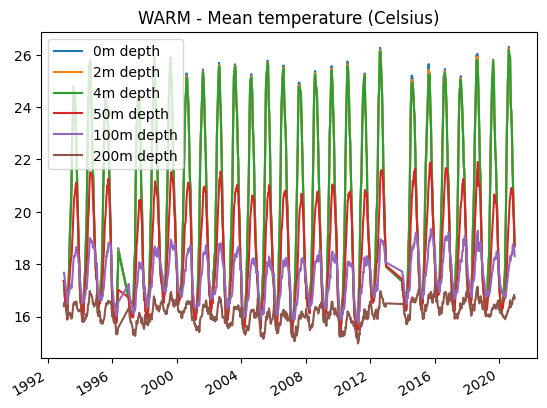

In [8]:
db = db_warm
db = db.sort_values(by="time", ascending=True)

plt.title("WARM - Mean temperature (Celsius)")
plt.plot_date(
    db["time"], db["water_temp_0_mean"], label="0m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["water_temp_2_mean"], label="2m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["water_temp_4_mean"], label="4m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"],
    db["water_temp_50_mean"],
    label="50m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["water_temp_100_mean"],
    label="100m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["water_temp_200_mean"],
    label="200m depth",
    linestyle="solid",
    marker="",
)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

In [9]:
db = db_cold
db = db.sort_values(by="time", ascending=True)

plt.title("COLD - Mean temperature (Celsius)")
plt.plot_date(
    db["time"], db["water_temp_0_mean"], label="0m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["water_temp_2_mean"], label="2m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["water_temp_4_mean"], label="4m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"],
    db["water_temp_50_mean"],
    label="50m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["water_temp_100_mean"],
    label="100m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["water_temp_200_mean"],
    label="200m depth",
    linestyle="solid",
    marker="",
)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

/tmp/ipykernel_28422/875708173.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/875708173.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/875708173.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/875708173.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/875708173.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marke

In [10]:
db = db_warm

db = db.sort_values(by="millis", ascending=True)

plt.title("WARM - Best fit mean temperature (Celsius)")

plt.plot(db["millis"], db["water_temp_0_mean"], label="0m depth")
plt.plot(db["millis"], db["water_temp_100_mean"], label="100m depth")
plt.plot(db["millis"], db["water_temp_500_mean"], label="500m depth")

x = np.array(db["millis"])

y = np.array(db["water_temp_0_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(db["water_temp_100_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 100m depth")

y = np.array(db["water_temp_500_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

9.13508338978708e-13
4.990064437038464e-13
3.8042197346828576e-13


-4.8502934027985526e-14
-2.0054109407627436e-13
-5.208792747699571e-14


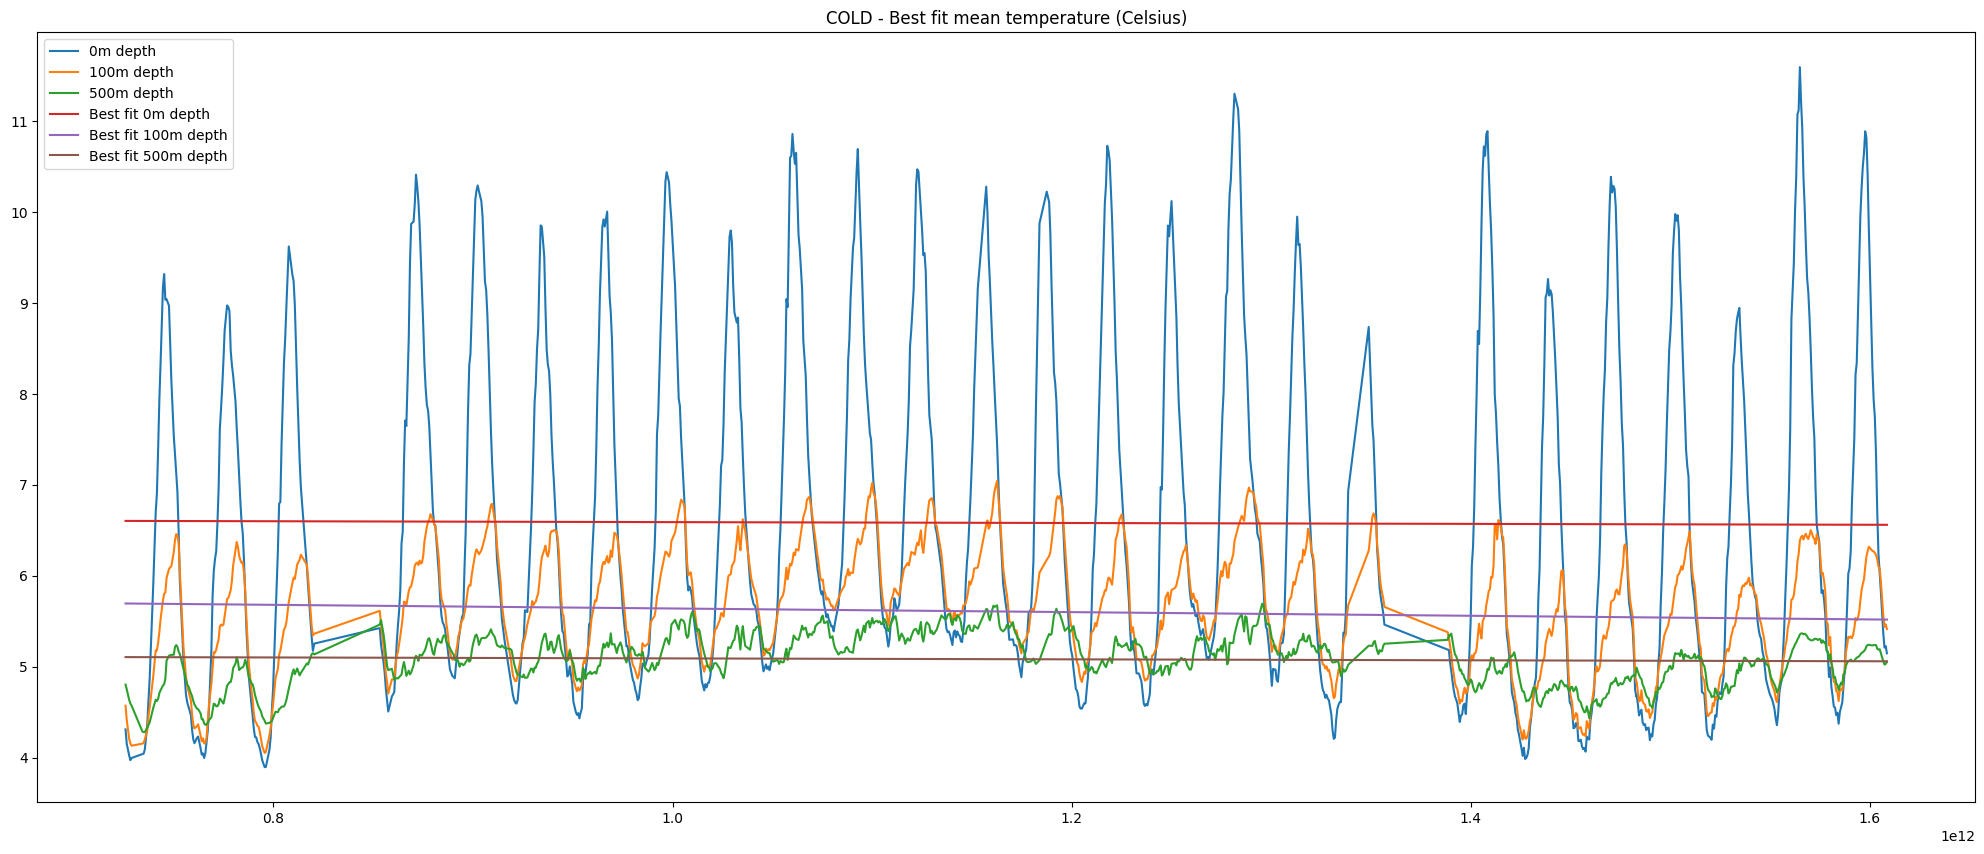

In [11]:
db = db_cold

db = db.sort_values(by="millis", ascending=True)

plt.title("COLD - Best fit mean temperature (Celsius)")

plt.plot(db["millis"], db["water_temp_0_mean"], label="0m depth")
plt.plot(db["millis"], db["water_temp_100_mean"], label="100m depth")
plt.plot(db["millis"], db["water_temp_500_mean"], label="500m depth")

x = np.array(db["millis"])

y = np.array(db["water_temp_0_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(db["water_temp_100_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 100m depth")

y = np.array(db["water_temp_500_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

5.55526676941554e-13
-2.0761551323971185e-13
-3.9892963667291313e-13


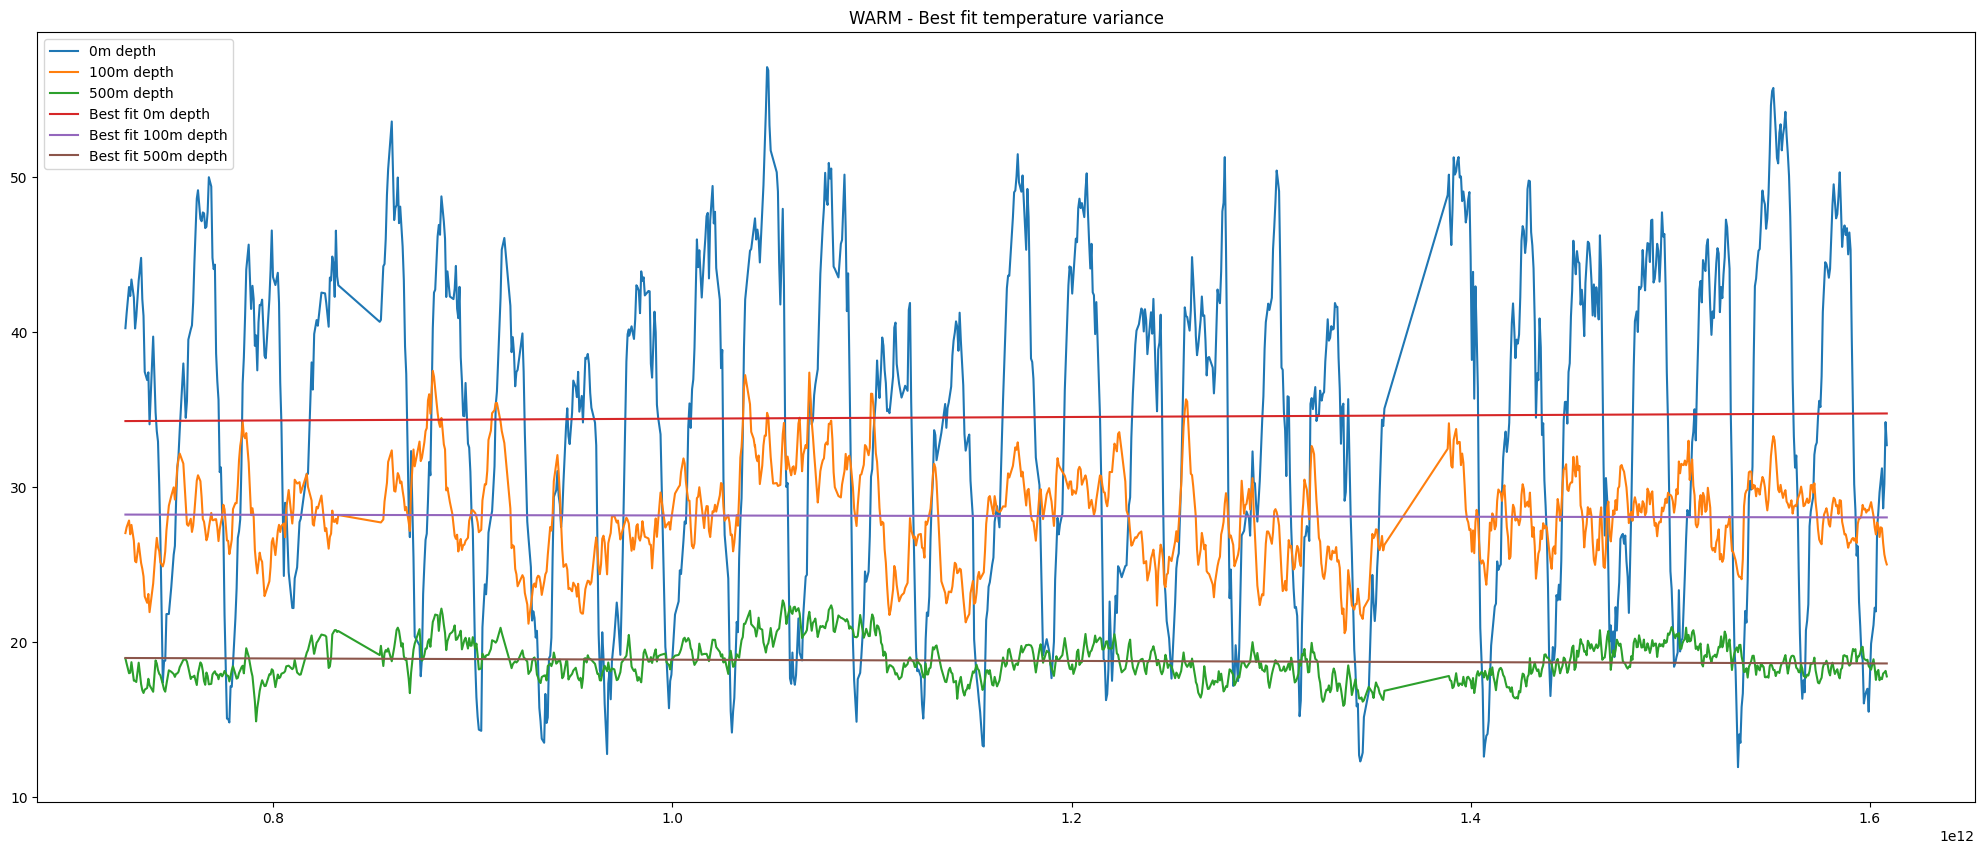

In [12]:
db = db_warm

db = db.sort_values(by="millis", ascending=True)

plt.title("WARM - Best fit temperature variance")

plt.plot(db["millis"], db["water_temp_0_variance"], label="0m depth")
plt.plot(db["millis"], db["water_temp_100_variance"], label="100m depth")
plt.plot(db["millis"], db["water_temp_500_variance"], label="500m depth")

x = np.array(db["millis"])

y = np.array(db["water_temp_0_variance"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(db["water_temp_100_variance"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 100m depth")

y = np.array(db["water_temp_500_variance"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

-1.3797148237949458e-12
-1.20158566398403e-12
-5.231262514697904e-13


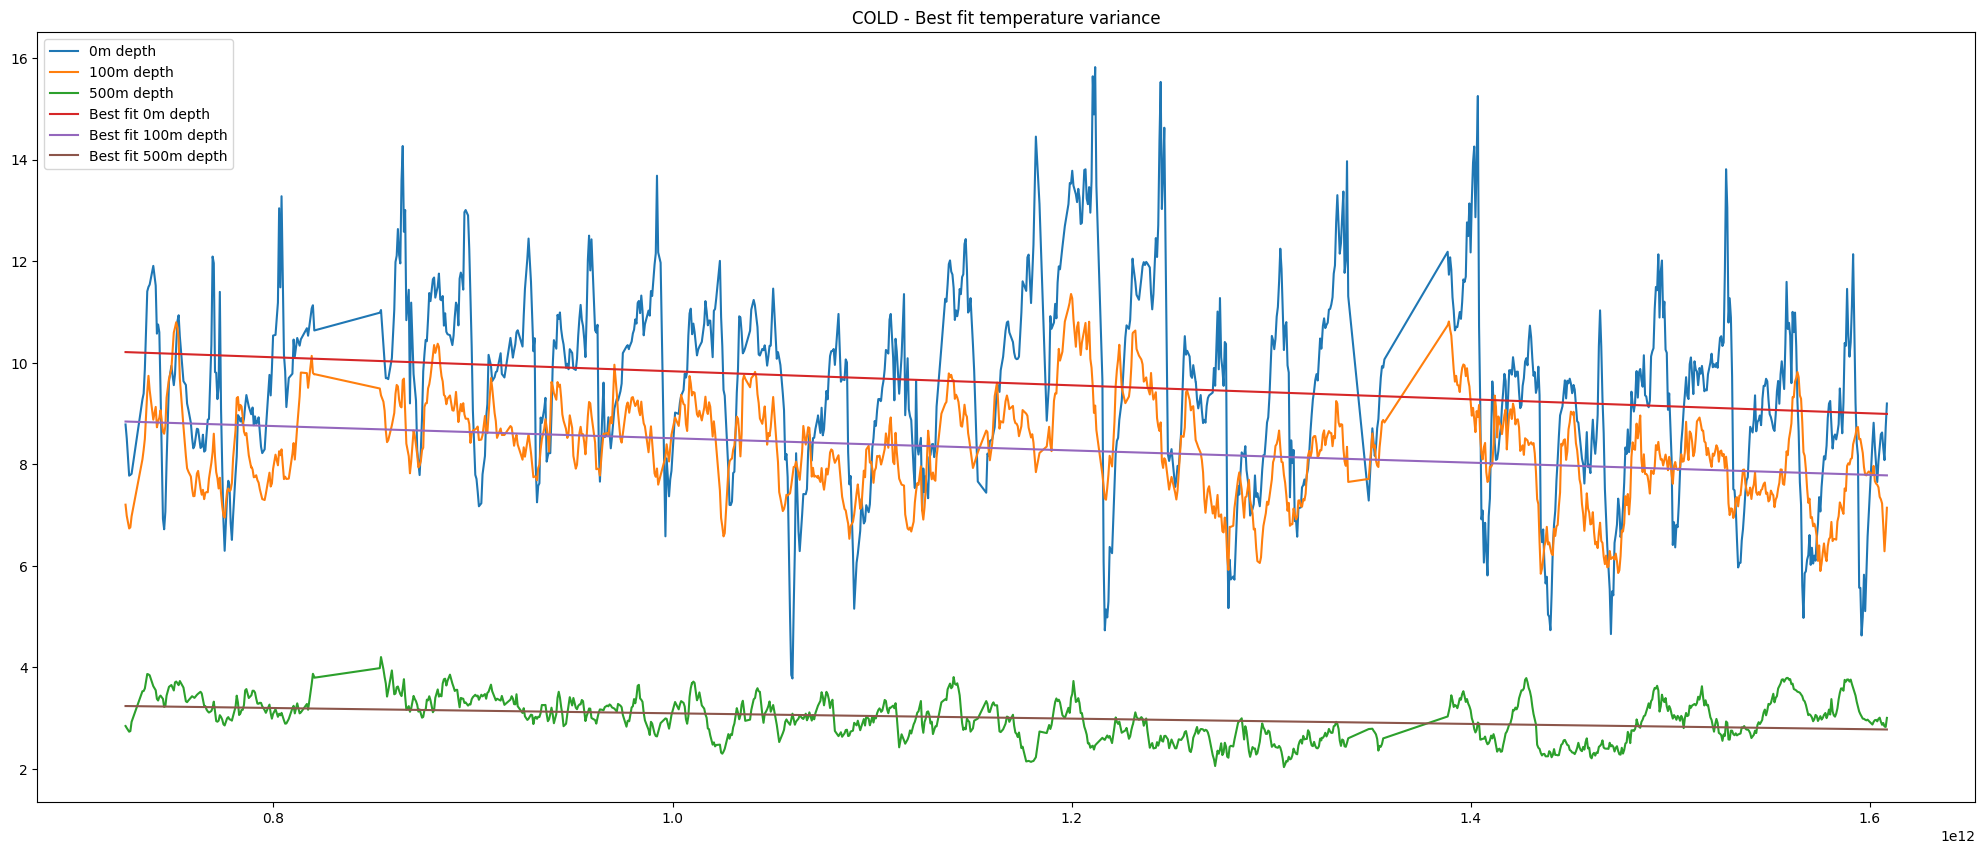

In [13]:
db = db_cold

db = db.sort_values(by="millis", ascending=True)

plt.title("COLD - Best fit temperature variance")

plt.plot(db["millis"], db["water_temp_0_variance"], label="0m depth")
plt.plot(db["millis"], db["water_temp_100_variance"], label="100m depth")
plt.plot(db["millis"], db["water_temp_500_variance"], label="500m depth")

x = np.array(db["millis"])

y = np.array(db["water_temp_0_variance"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(db["water_temp_100_variance"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 100m depth")

y = np.array(db["water_temp_500_variance"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

1.3185277209079158e-12
9.13508338978708e-13
3.863860439151043e-14


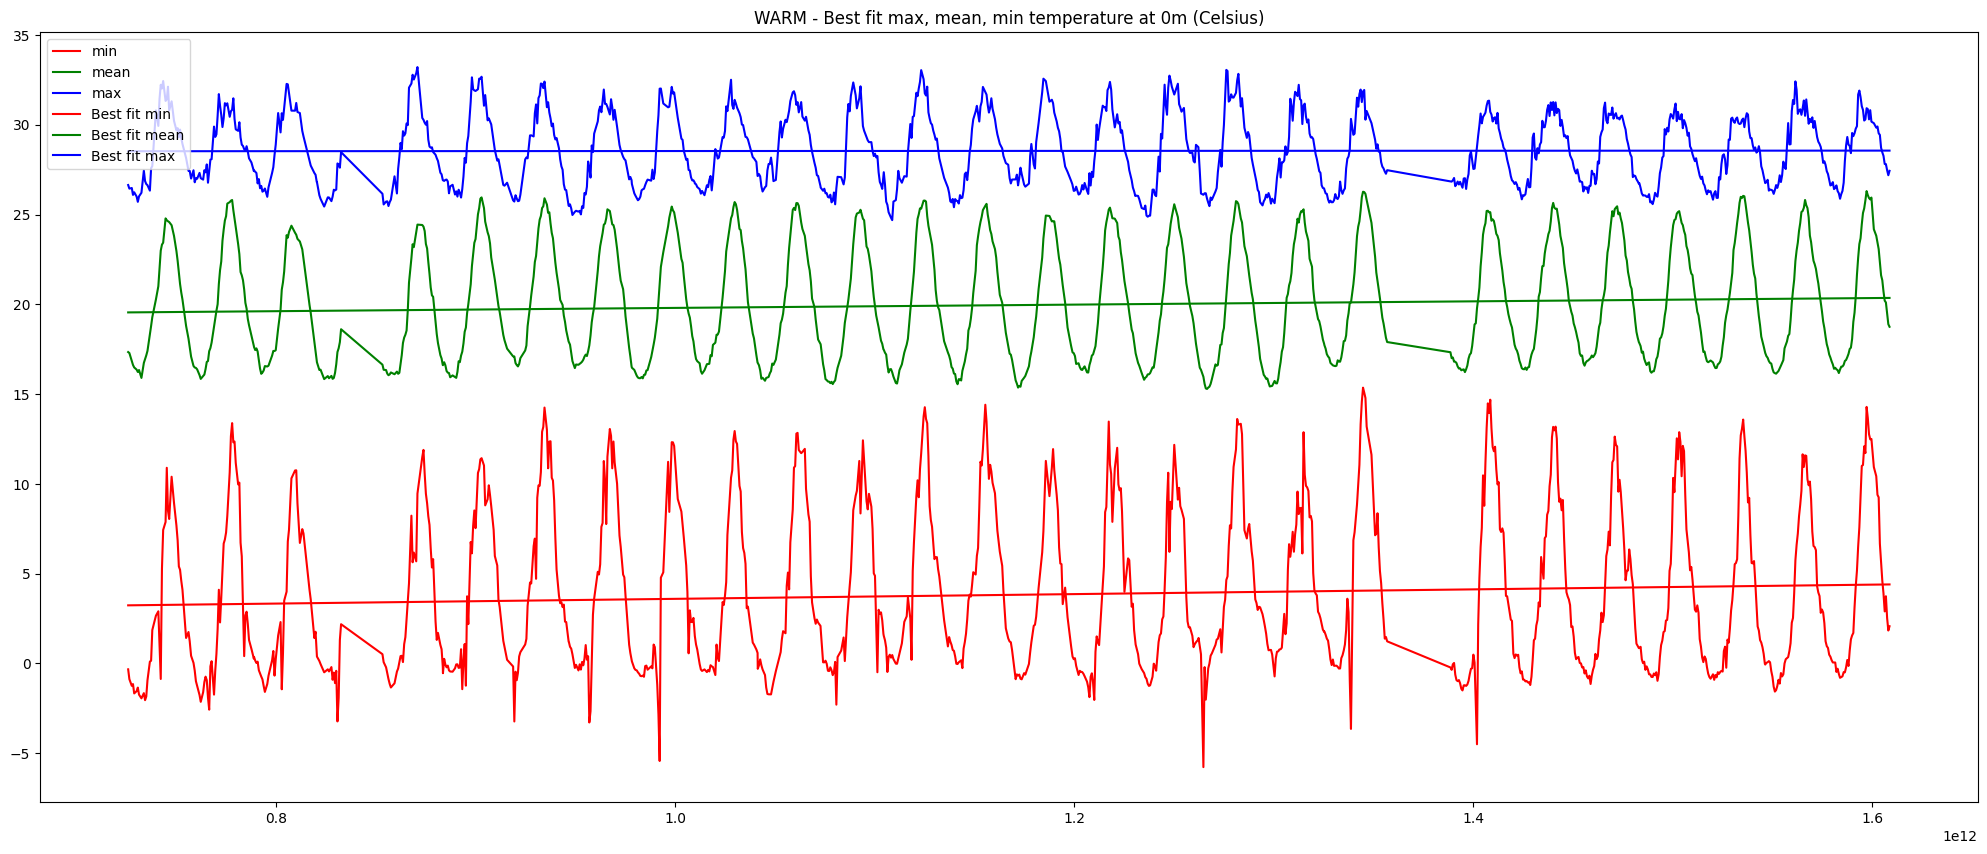

In [14]:
db = db_warm

db = db.sort_values(by="millis", ascending=True)

plt.title("WARM - Best fit max, mean, min temperature at 0m (Celsius)")

plt.plot(db["millis"], db["water_temp_0_min"], label="min", color="red")
plt.plot(db["millis"], db["water_temp_0_mean"], label="mean", color="green")
plt.plot(db["millis"], db["water_temp_0_max"], label="max", color="blue")

x = np.array(db["millis"])

y = np.array(db["water_temp_0_min"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit min", color="red")

y = np.array(db["water_temp_0_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit mean", color="green")

y = np.array(db["water_temp_0_max"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit max", color="blue")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

5.411281709199635e-13
-4.8502934027985526e-14
-3.742790119594282e-13


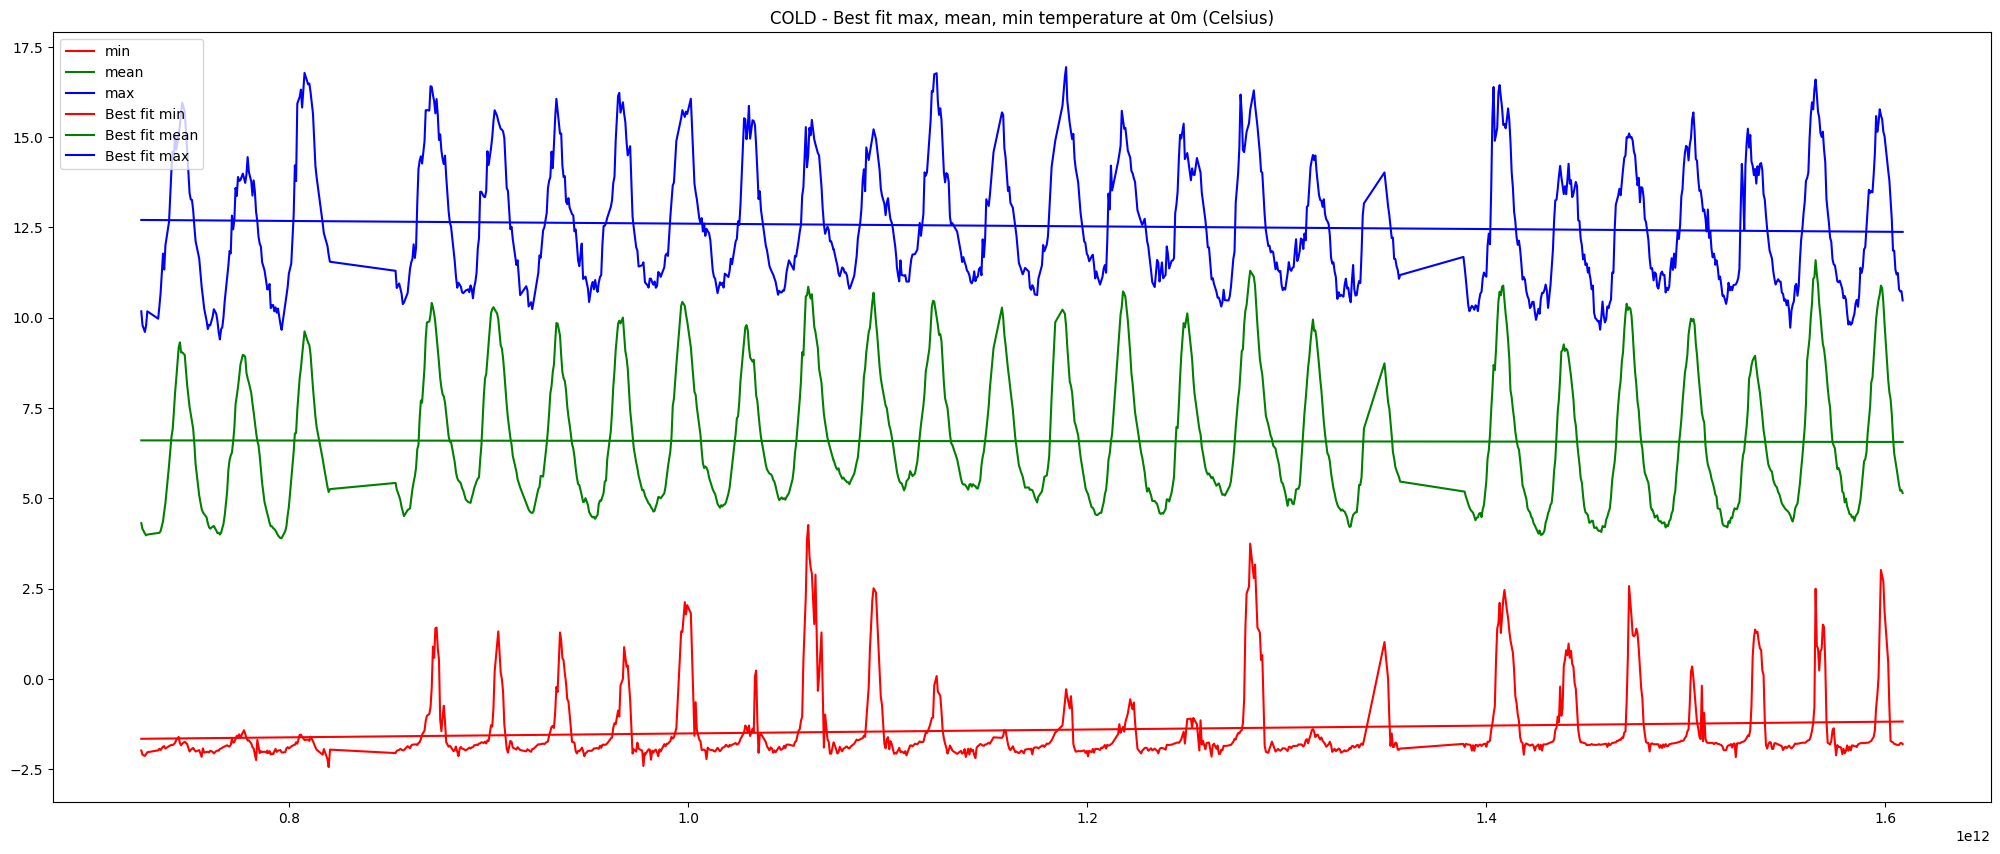

In [15]:
db = db_cold

db = db.sort_values(by="millis", ascending=True)

plt.title("COLD - Best fit max, mean, min temperature at 0m (Celsius)")

plt.plot(db["millis"], db["water_temp_0_min"], label="min", color="red")
plt.plot(db["millis"], db["water_temp_0_mean"], label="mean", color="green")
plt.plot(db["millis"], db["water_temp_0_max"], label="max", color="blue")

x = np.array(db["millis"])

y = np.array(db["water_temp_0_min"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit min", color="red")

y = np.array(db["water_temp_0_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit mean", color="green")

y = np.array(db["water_temp_0_max"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit max", color="blue")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

In [16]:
# HEATMAP - not working

db_warm = db_warm.sort_values(by="millis", ascending=True)
db_cold = db_cold.sort_values(by="millis", ascending=True)

heatmap_warm = db_warm[
    ["millis"] + ["water_temp_0_mean", "water_temp_50_mean"]
]  # + [('water_temp_' + str(depth) + '_mean') for depth in depths]
heatmap_warm.reset_index()
heatmap_warm.set_index("millis")
heatmap_warm.reset_index()
print(heatmap_warm)

plt.pcolor(heatmap_warm)
plt.yticks(np.arange(0.5, len(heatmap_warm.index), 1), heatmap_warm.index)
plt.xticks(np.arange(0.5, len(heatmap_warm.columns), 1), heatmap_warm.columns)
plt.show()

             millis  water_temp_0_mean  water_temp_50_mean
0      725846400000          17.341754           17.361966
1      726451200000          17.287493           17.298650
3      727660800000          16.844019           16.902017
4      728265600000          16.623959           16.698837
5      728870400000          16.485118           16.538284
...             ...                ...                 ...
1421  1606176000000          20.203517           19.796974
1422  1606780800000          20.101892           19.732768
1423  1607385600000          19.495971           19.318296
1424  1607990400000          18.892275           18.838727
1425  1608595200000          18.748750           18.674298

[1169 rows x 3 columns]


### Salinity

In [17]:
db = db_warm
db = db.sort_values(by="time", ascending=True)

plt.title("WARM - Mean salinity")
plt.plot_date(
    db["time"], db["salinity_0_mean"], label="0m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["salinity_2_mean"], label="2m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["salinity_4_mean"], label="4m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["salinity_50_mean"], label="50m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"],
    db["salinity_100_mean"],
    label="100m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["salinity_200_mean"],
    label="200m depth",
    linestyle="solid",
    marker="",
)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

/tmp/ipykernel_28422/446206938.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/446206938.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/446206938.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/446206938.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/446206938.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marke

In [18]:
db = db_cold
db = db.sort_values(by="time", ascending=True)

plt.title("COLD - Mean salinity")
plt.plot_date(
    db["time"], db["salinity_0_mean"], label="0m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["salinity_2_mean"], label="2m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["salinity_4_mean"], label="4m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["salinity_50_mean"], label="50m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"],
    db["salinity_100_mean"],
    label="100m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["salinity_200_mean"],
    label="200m depth",
    linestyle="solid",
    marker="",
)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

/tmp/ipykernel_28422/2607667840.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2607667840.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2607667840.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2607667840.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/2607667840.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> 

In [19]:
db = db_warm

db = db.sort_values(by="millis", ascending=True)

plt.title("WARM - Best fit mean salinity")

plt.plot(db["millis"], db["salinity_0_mean"], label="0m depth")
plt.plot(db["millis"], db["salinity_100_mean"], label="100m depth")
plt.plot(db["millis"], db["salinity_500_mean"], label="500m depth")

x = np.array(db["millis"])

y = np.array(db["salinity_0_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(db["salinity_100_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 100m depth")

y = np.array(db["salinity_500_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

3.2226979468181134e-14
1.9810932215862767e-13
4.510744123170732e-14


-2.4251344620995023e-14
-2.3764962530222672e-14
-1.1091207428606582e-14


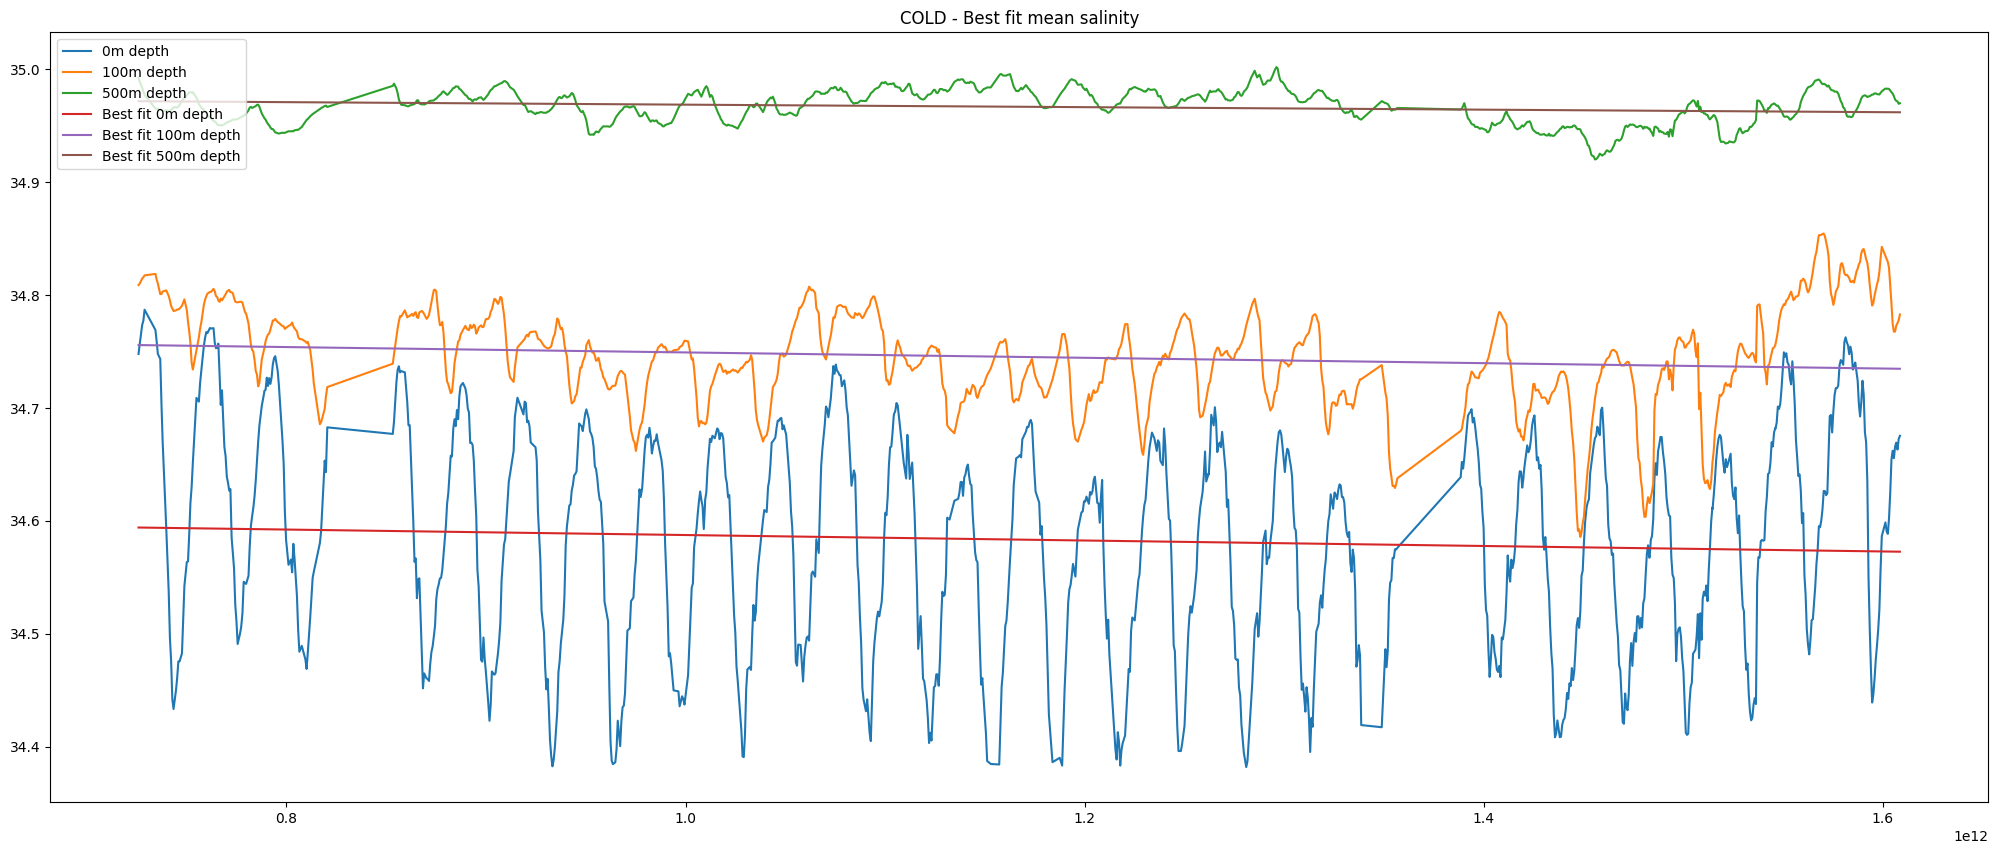

In [20]:
db = db_cold

db = db.sort_values(by="millis", ascending=True)

plt.title("COLD - Best fit mean salinity")

plt.plot(db["millis"], db["salinity_0_mean"], label="0m depth")
plt.plot(db["millis"], db["salinity_100_mean"], label="100m depth")
plt.plot(db["millis"], db["salinity_500_mean"], label="500m depth")

x = np.array(db["millis"])

y = np.array(db["salinity_0_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(db["salinity_100_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 100m depth")

y = np.array(db["salinity_500_mean"])
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

### Velocity

/tmp/ipykernel_28422/164986258.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/164986258.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/164986258.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/164986258.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/164986258.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marke

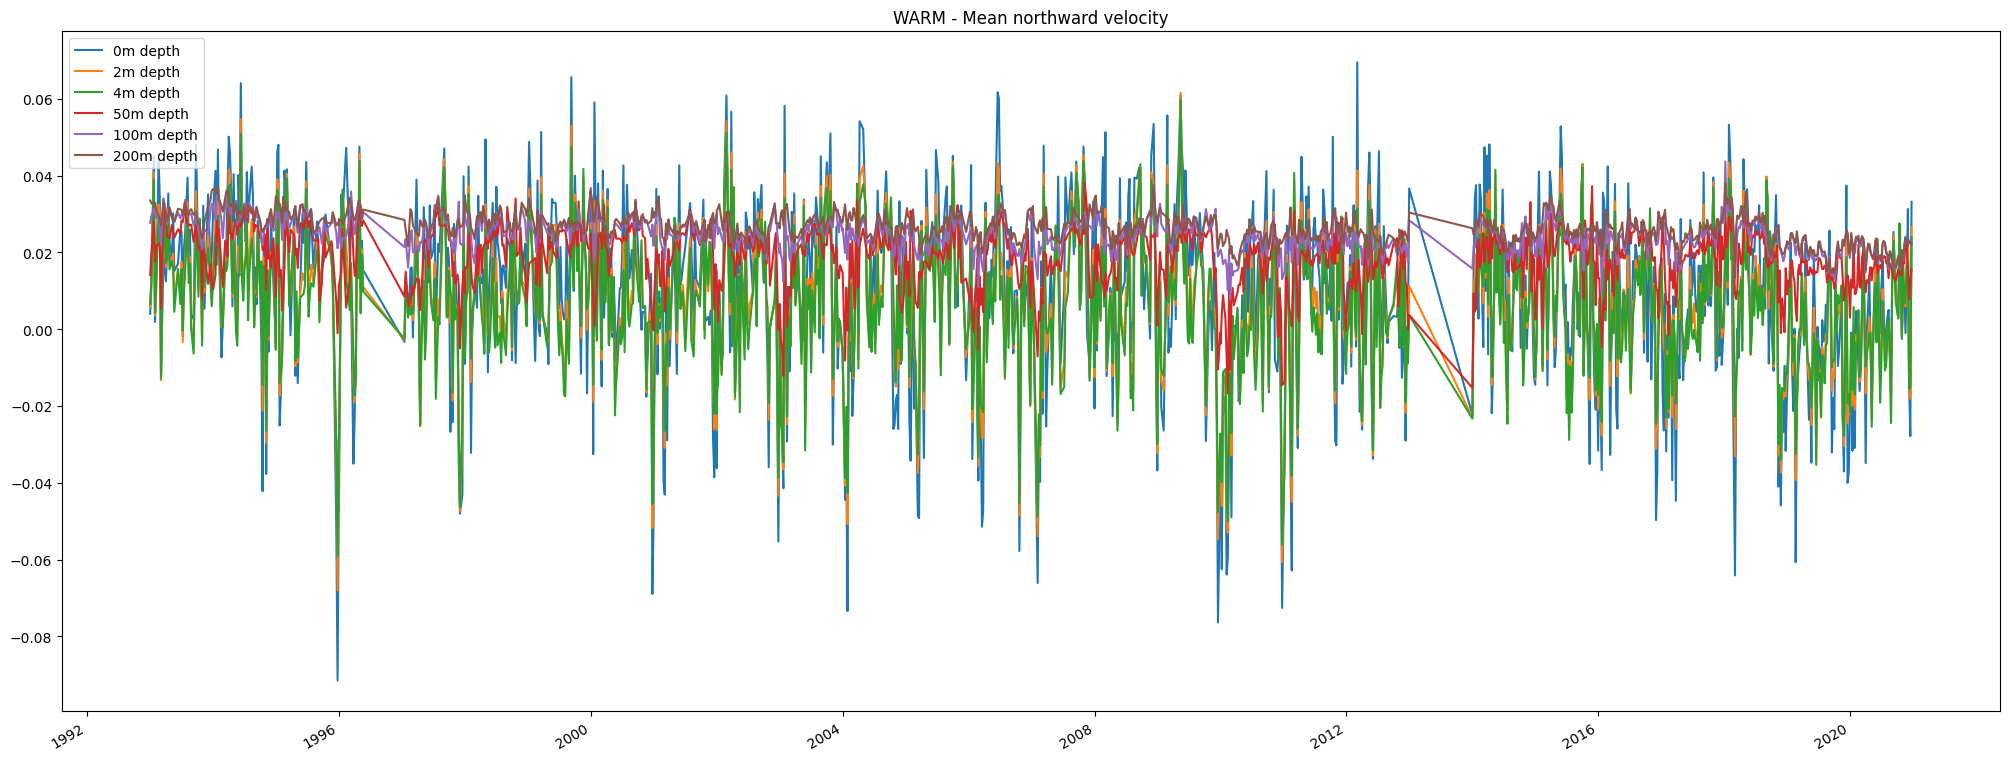

In [21]:
db = db_warm

db = db.sort_values(by="time", ascending=True)

plt.title("WARM - Mean northward velocity")
plt.plot_date(
    db["time"], db["velocity_v_0_mean"], label="0m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["velocity_v_2_mean"], label="2m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["velocity_v_4_mean"], label="4m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"],
    db["velocity_v_50_mean"],
    label="50m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["velocity_v_100_mean"],
    label="100m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["velocity_v_200_mean"],
    label="200m depth",
    linestyle="solid",
    marker="",
)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

/tmp/ipykernel_28422/1759045059.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/1759045059.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/1759045059.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/1759045059.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/1759045059.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> 

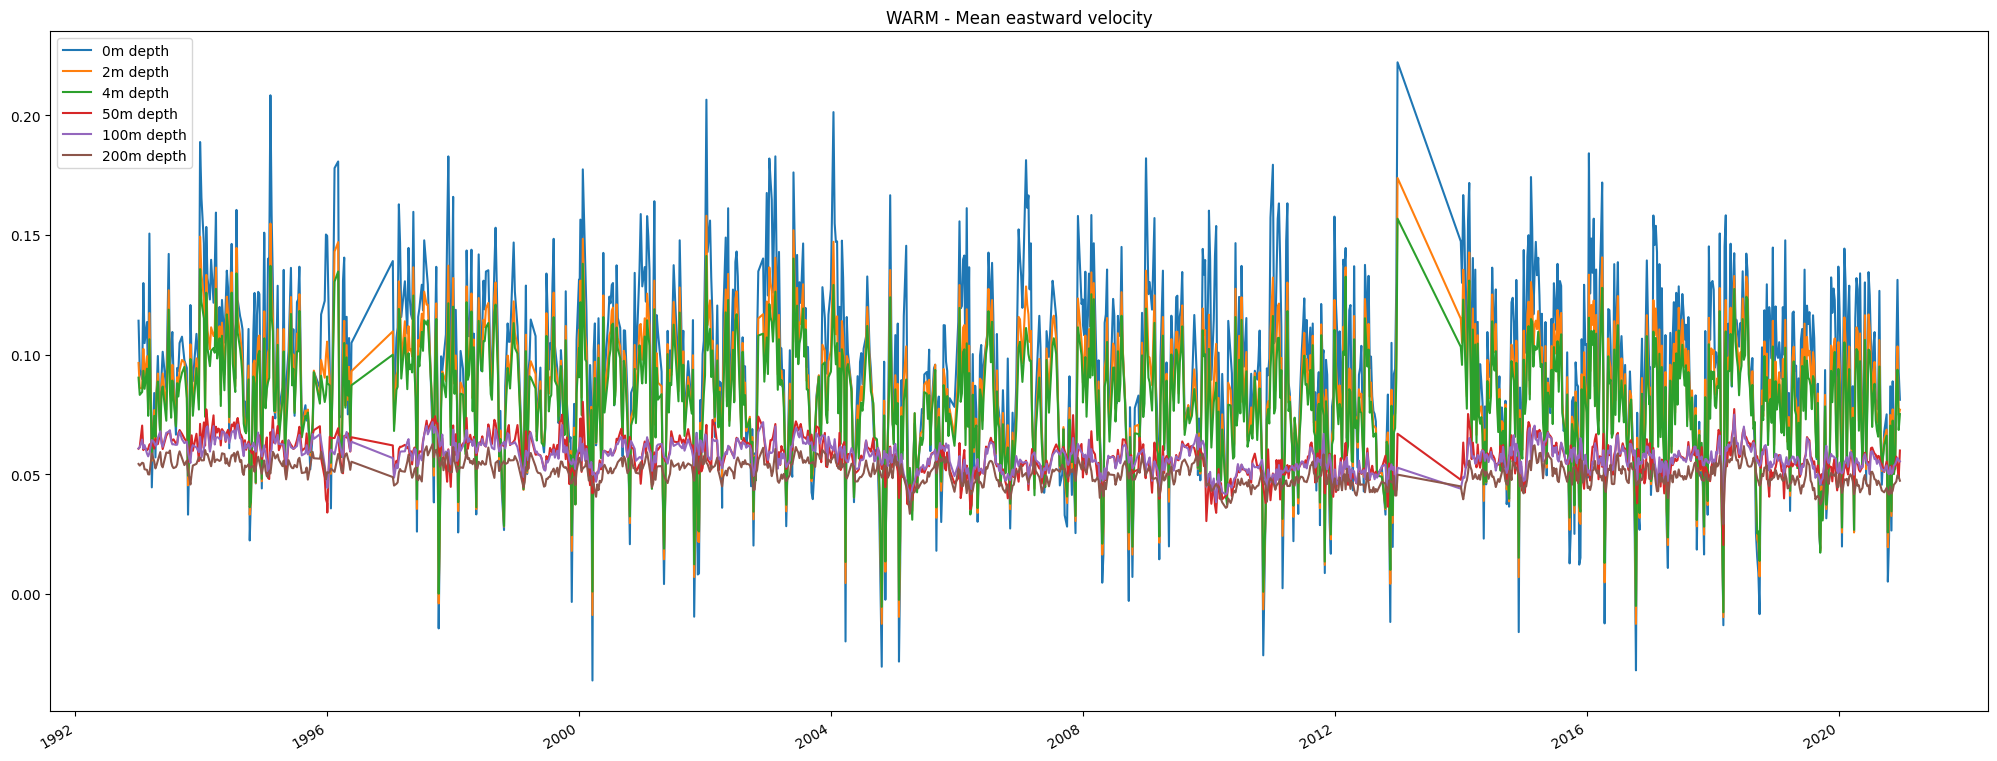

In [22]:
db = db_warm

db = db.sort_values(by="time", ascending=True)

plt.title("WARM - Mean eastward velocity")
plt.plot_date(
    db["time"], db["velocity_u_0_mean"], label="0m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["velocity_u_2_mean"], label="2m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"], db["velocity_u_4_mean"], label="4m depth", linestyle="solid", marker=""
)
plt.plot_date(
    db["time"],
    db["velocity_u_50_mean"],
    label="50m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["velocity_u_100_mean"],
    label="100m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    db["velocity_u_200_mean"],
    label="200m depth",
    linestyle="solid",
    marker="",
)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

/tmp/ipykernel_28422/3837682919.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/3837682919.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/3837682919.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/3837682919.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(
/tmp/ipykernel_28422/3837682919.py:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (->

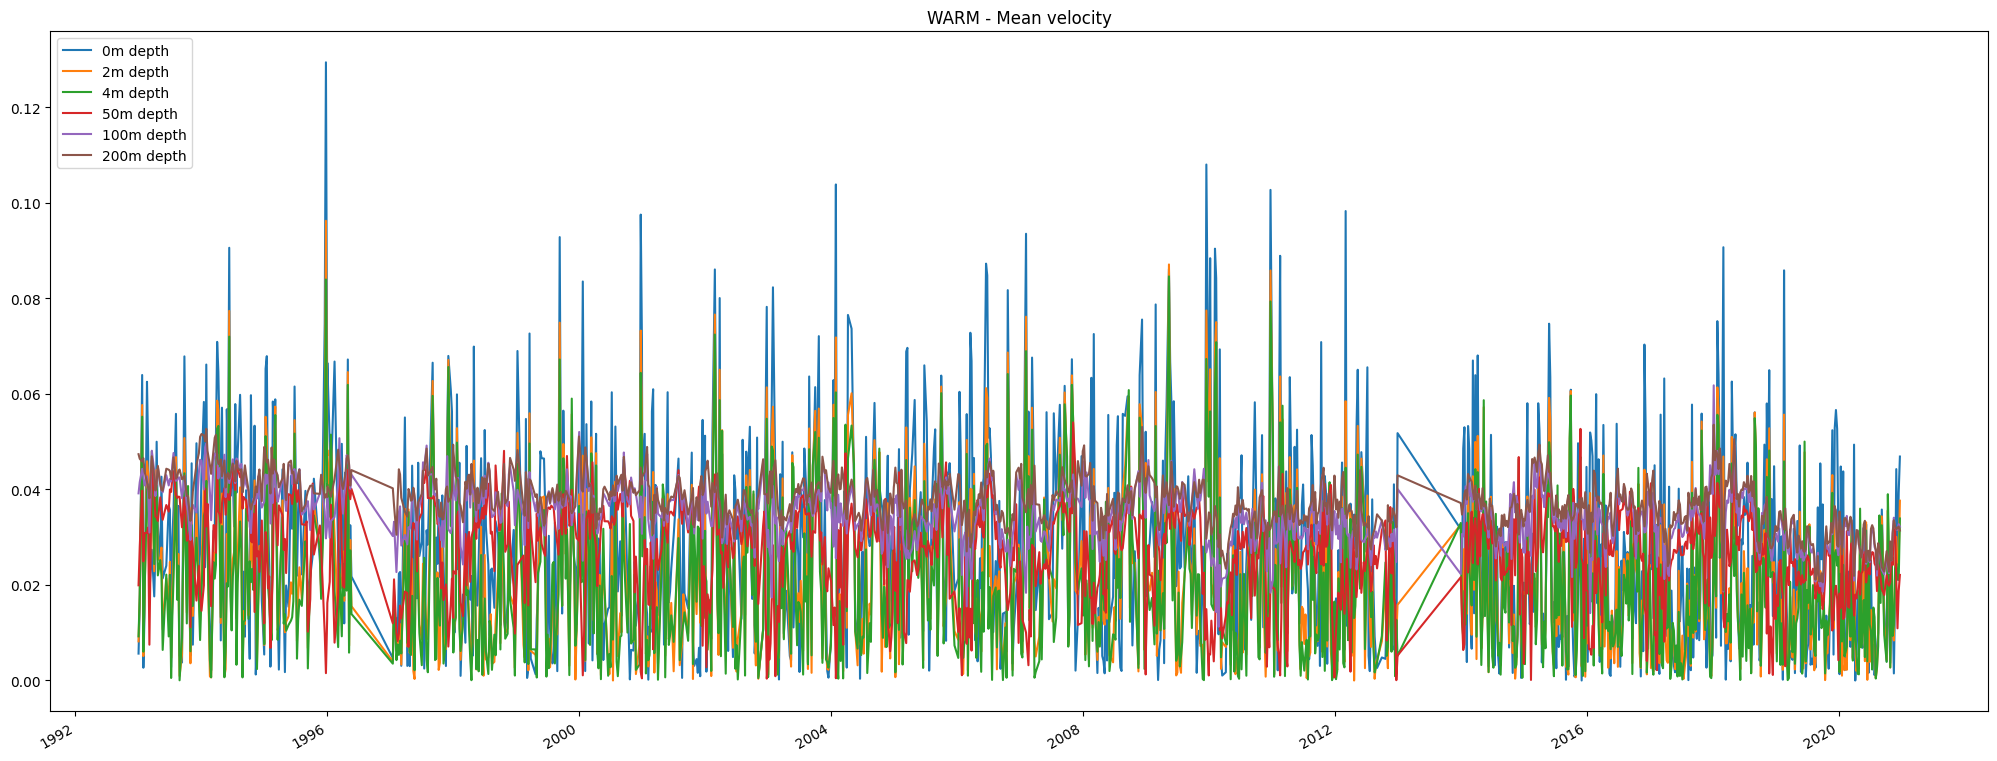

In [23]:
# Pythagoras

db = db_warm

db = db.sort_values(by="time", ascending=True)

plt.title("WARM - Mean velocity")
plt.plot_date(
    db["time"],
    (db["velocity_v_0_mean"] ** 2 + db["velocity_v_0_mean"] ** 2) ** 0.5,
    label="0m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    (db["velocity_v_2_mean"] ** 2 + db["velocity_v_2_mean"] ** 2) ** 0.5,
    label="2m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    (db["velocity_v_4_mean"] ** 2 + db["velocity_v_4_mean"] ** 2) ** 0.5,
    label="4m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    (db["velocity_v_50_mean"] ** 2 + db["velocity_v_50_mean"] ** 2) ** 0.5,
    label="50m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    (db["velocity_v_100_mean"] ** 2 + db["velocity_v_100_mean"] ** 2) ** 0.5,
    label="100m depth",
    linestyle="solid",
    marker="",
)
plt.plot_date(
    db["time"],
    (db["velocity_v_200_mean"] ** 2 + db["velocity_v_200_mean"] ** 2) ** 0.5,
    label="200m depth",
    linestyle="solid",
    marker="",
)
plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [11, 6]
plt.show()

-1.0164348560134303e-14
-5.290962711065264e-15
1.787254329103401e-15
1.0954013458702857e-15


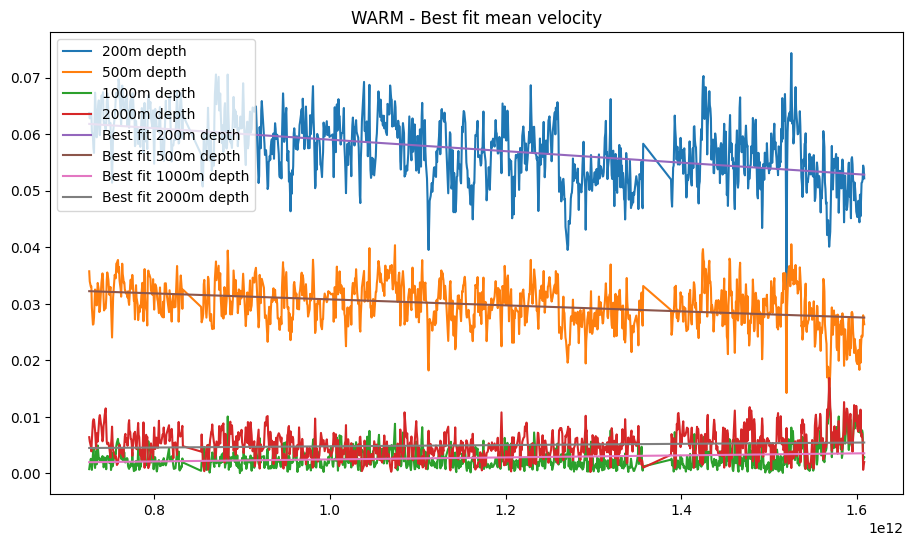

In [24]:
db = db_warm
db = db.sort_values(by="millis", ascending=True)

plt.title("WARM - Best fit mean velocity")

plt.plot(
    db["millis"],
    (db["velocity_v_200_mean"] ** 2 + db["velocity_u_200_mean"] ** 2) ** 0.5,
    label="200m depth",
)

plt.plot(
    db["millis"],
    (db["velocity_v_500_mean"] ** 2 + db["velocity_u_500_mean"] ** 2) ** 0.5,
    label="500m depth",
)
plt.plot(
    db["millis"],
    (db["velocity_v_1000_mean"] ** 2 + db["velocity_u_1000_mean"] ** 2) ** 0.5,
    label="1000m depth",
)
plt.plot(
    db["millis"],
    (db["velocity_v_2000_mean"] ** 2 + db["velocity_u_2000_mean"] ** 2) ** 0.5,
    label="2000m depth",
)

x = np.array(db["millis"])


y = np.array((db["velocity_v_200_mean"] ** 2 + db["velocity_u_200_mean"] ** 2) ** 0.5)
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 200m depth")


y = np.array((db["velocity_v_500_mean"] ** 2 + db["velocity_u_500_mean"] ** 2) ** 0.5)
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

y = np.array((db["velocity_v_1000_mean"] ** 2 + db["velocity_u_1000_mean"] ** 2) ** 0.5)
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 1000m depth")

y = np.array((db["velocity_v_2000_mean"] ** 2 + db["velocity_u_2000_mean"] ** 2) ** 0.5)
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 2000m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

1.3881606780175473e-15
1.2382224996682384e-15
1.0943781034138082e-15


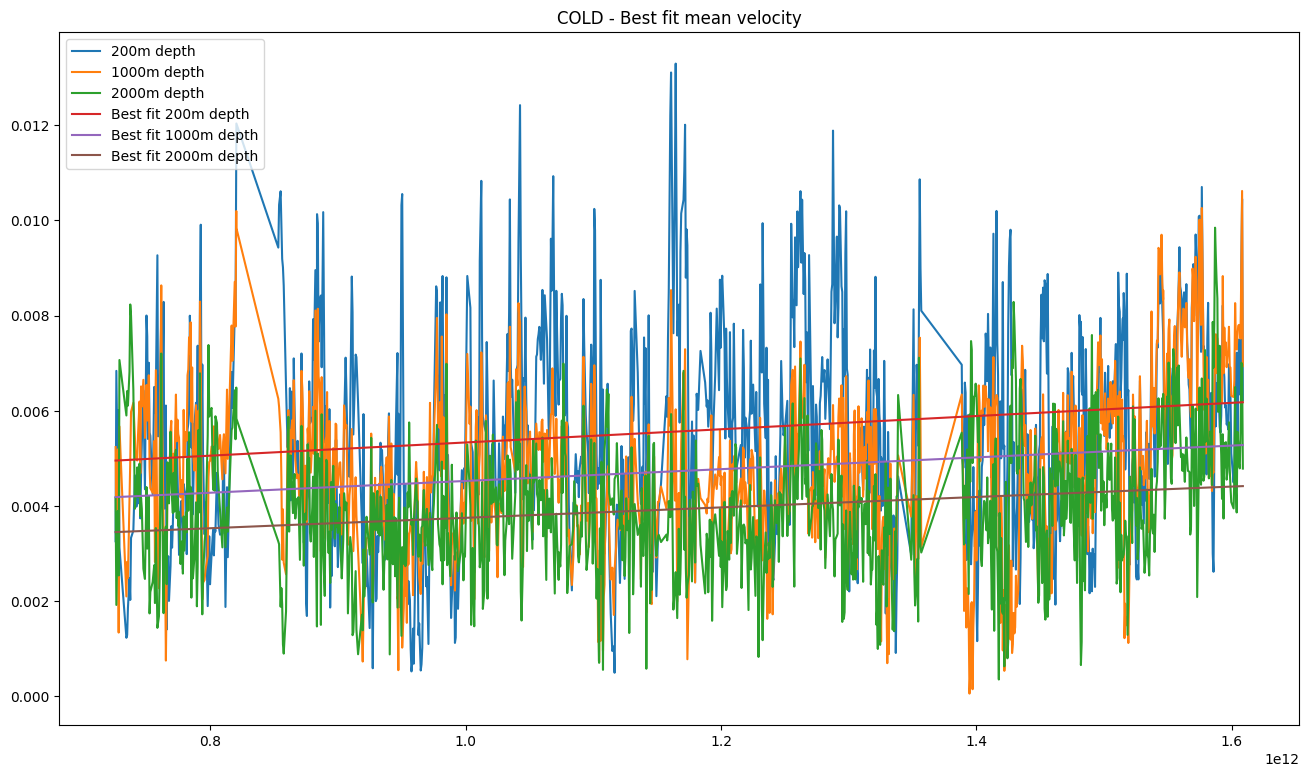

In [25]:
db = db_cold
db = db.sort_values(by="millis", ascending=True)

plt.title("COLD - Best fit mean velocity")

plt.plot(
    db["millis"],
    (db["velocity_v_200_mean"] ** 2 + db["velocity_u_200_mean"] ** 2) ** 0.5,
    label="200m depth",
)

# plt.plot(db['millis'], (db['velocity_v_500_mean'] **2 + db['velocity_u_500_mean'] **2)**0.5, label='500m depth')
plt.plot(
    db["millis"],
    (db["velocity_v_1000_mean"] ** 2 + db["velocity_u_1000_mean"] ** 2) ** 0.5,
    label="1000m depth",
)
plt.plot(
    db["millis"],
    (db["velocity_v_2000_mean"] ** 2 + db["velocity_u_2000_mean"] ** 2) ** 0.5,
    label="2000m depth",
)

x = np.array(db["millis"])


y = np.array((db["velocity_v_200_mean"] ** 2 + db["velocity_u_200_mean"] ** 2) ** 0.5)
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 200m depth")


# y = np.array((db['velocity_v_500_mean'] **2 + db['velocity_u_500_mean'] **2)**0.5)
# m, b = np.polyfit(x, y, 1)
# print(m)
# plt.plot(x, m*x + b, label='Best fit 500m depth')

y = np.array((db["velocity_v_1000_mean"] ** 2 + db["velocity_u_1000_mean"] ** 2) ** 0.5)
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 1000m depth")

y = np.array((db["velocity_v_2000_mean"] ** 2 + db["velocity_u_2000_mean"] ** 2) ** 0.5)
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 2000m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

-8.116433009082463e-12
-7.961948064683295e-13
1.5659893011188807e-11
-4.9711685619882285e-12


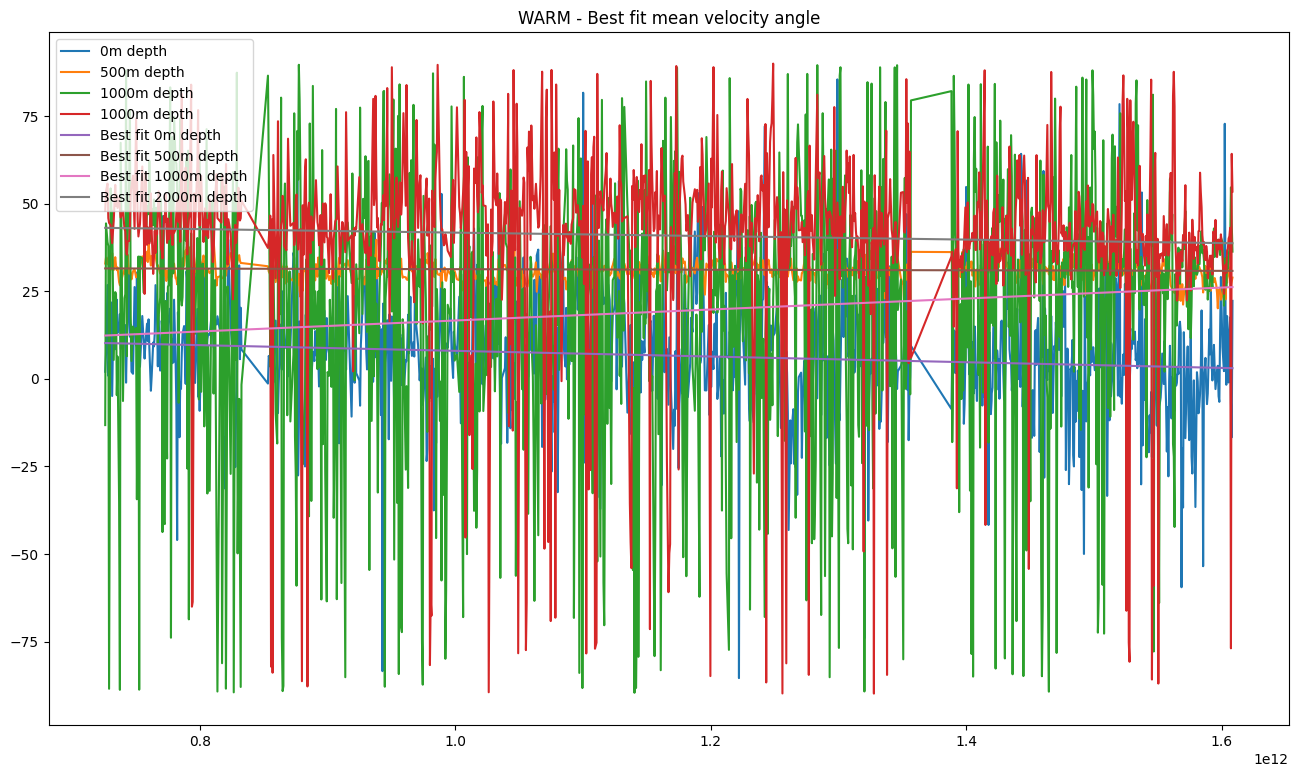

In [26]:
db = db_warm

db = db.sort_values(by="millis", ascending=True)


def calc_angle(u, v):
    return np.degrees(np.arctan(v / u))


plt.title("WARM - Best fit mean velocity angle")

plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_0_mean"], db["velocity_v_0_mean"]),
    label="0m depth",
)
plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_500_mean"], db["velocity_v_500_mean"]),
    label="500m depth",
)
plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_1000_mean"], db["velocity_v_1000_mean"]),
    label="1000m depth",
)
plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_2000_mean"], db["velocity_v_2000_mean"]),
    label="1000m depth",
)

x = np.array(db["millis"])

y = np.array(calc_angle(db["velocity_u_0_mean"], db["velocity_v_0_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(calc_angle(db["velocity_u_500_mean"], db["velocity_v_500_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

y = np.array(calc_angle(db["velocity_u_1000_mean"], db["velocity_v_1000_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 1000m depth")

y = np.array(calc_angle(db["velocity_u_2000_mean"], db["velocity_v_2000_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 2000m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

-3.358560278906844e-12
7.017192920350054e-12
-3.3515668148487056e-12
6.798789832254655e-12


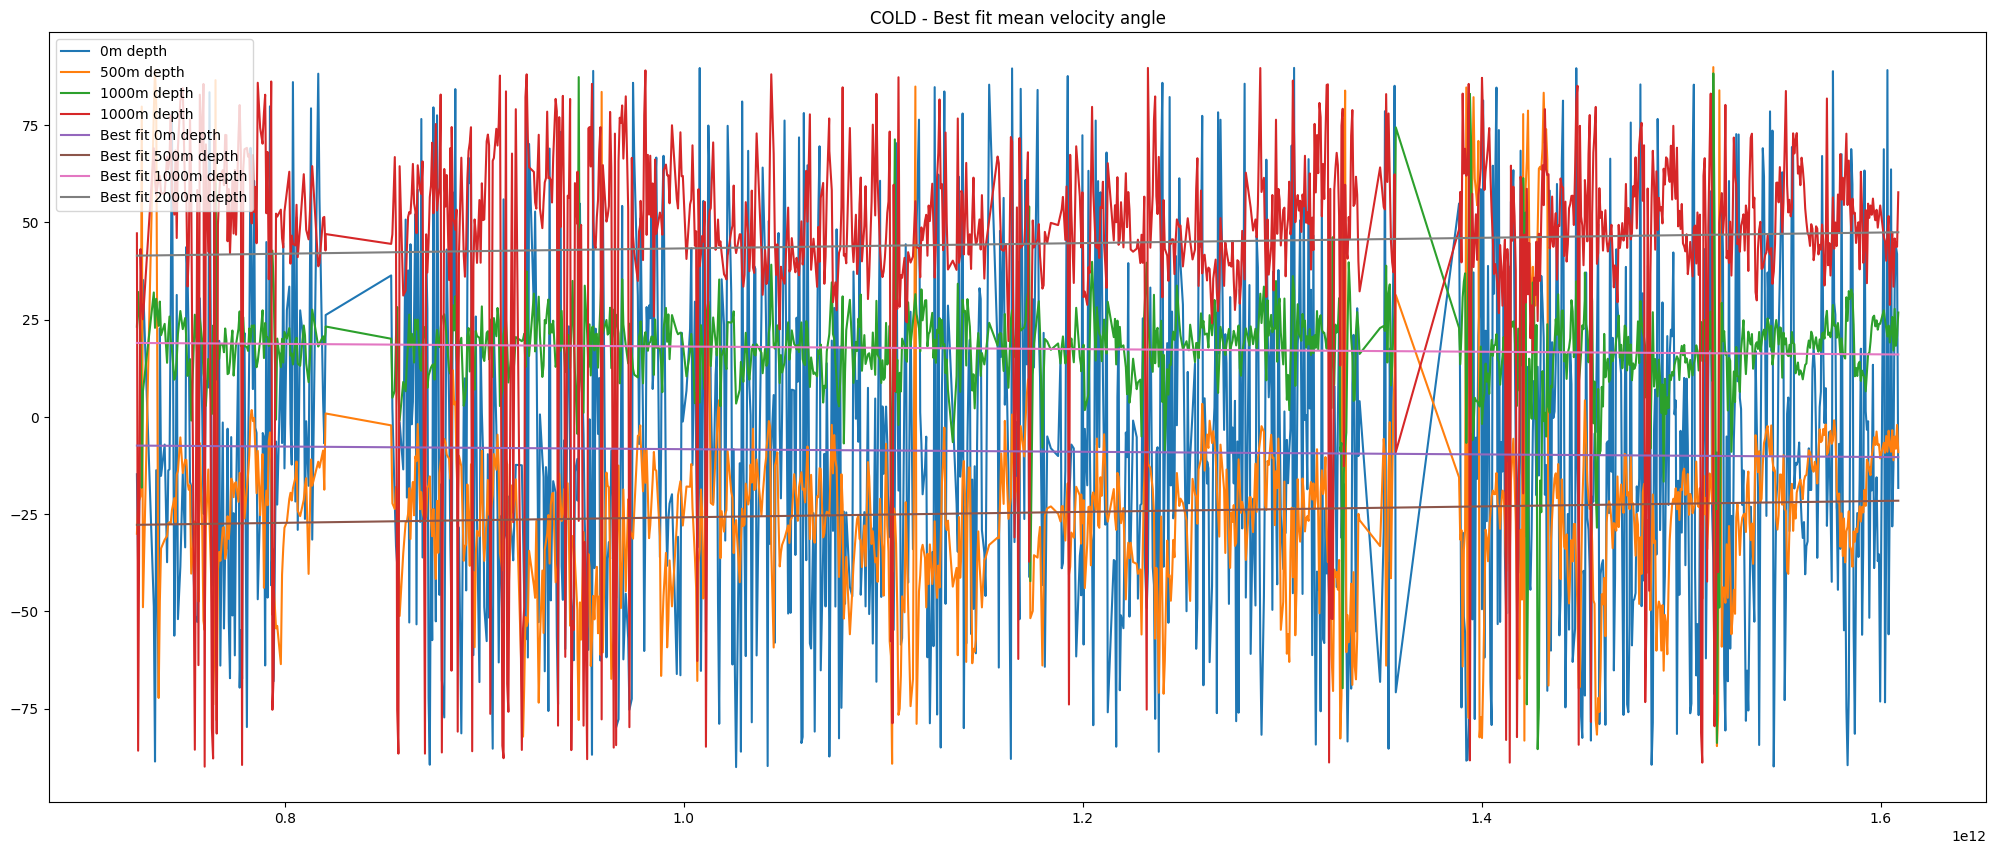

In [27]:
db = db_cold

db = db.sort_values(by="millis", ascending=True)


def calc_angle(u, v):
    return np.degrees(np.arctan(v / u))


plt.title("COLD - Best fit mean velocity angle")

plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_0_mean"], db["velocity_v_0_mean"]),
    label="0m depth",
)
plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_500_mean"], db["velocity_v_500_mean"]),
    label="500m depth",
)
plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_1000_mean"], db["velocity_v_1000_mean"]),
    label="1000m depth",
)
plt.plot(
    db["millis"],
    calc_angle(db["velocity_u_2000_mean"], db["velocity_v_2000_mean"]),
    label="1000m depth",
)

x = np.array(db["millis"])

y = np.array(calc_angle(db["velocity_u_0_mean"], db["velocity_v_0_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 0m depth")

y = np.array(calc_angle(db["velocity_u_500_mean"], db["velocity_v_500_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 500m depth")

y = np.array(calc_angle(db["velocity_u_1000_mean"], db["velocity_v_1000_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 1000m depth")

y = np.array(calc_angle(db["velocity_u_2000_mean"], db["velocity_v_2000_mean"]))
m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, m * x + b, label="Best fit 2000m depth")

plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

### Other


In [28]:
db = db_warm

corrcoef = []
for depth in depths:
    corrcoef.append(
        np.corrcoef(
            db["water_temp_" + str(depth) + "_mean"],
            db["salinity_" + str(depth) + "_mean"],
        )[0][1]
    )

print(corrcoef)

plt.title("WARM - correlation: Temperature - Salinity")

x = np.array([int(depth) for depth in depths])
y = np.array(corrcoef)

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)

plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.8545789702674906, -0.852747807672598, -0.8509345919985688, -0.8481701900763009, -0.8443950294959384, -0.8407338109584483, -0.8332030259434113, -0.8211871334242158, -0.7792820526833037, -0.7028828762957154, -0.5883709556944364, -0.4458185862337011, -0.2805481828416289, -0.12517522639928993, 0.022475108977170893, 0.2494883275735112, 0.3964637827970293, 0.512396848108449, 0.5837248452452676, 0.6450029336127311, 0.7179407097419612, 0.7256717472653147, 0.7736463093682899, 0.8106167637316688, 0.8509259249777409, 0.8913770675003991, 0.9263986685172869, 0.9718237936524545, 0.9634569342657189, 0.9421908445820193, 0.9530870582986597, 0.8365580833873947, 0.7234213765654356, 0.05295985028442701, -0.07458140298739895, -0.08076966858208337, 0.014271622752559564, 0.05278116468473635, -0.005569816187030882]


In [29]:
db = db_warm

corrcoef = []
for depth in depths:
    corrcoef.append(
        (
            np.corrcoef(
                db["water_temp_" + str(depth) + "_mean"],
                (
                    db["velocity_v_" + str(depth) + "_mean"] ** 2
                    + db["velocity_u_" + str(depth) + "_mean"] ** 2
                )
                ** 0.5,
            )
        )[0][1]
    )

print(corrcoef)

plt.title("WARM - correlation: Temperature - Velocity")

x = np.array([int(depth) for depth in depths])
y = np.array(corrcoef)

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)

plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.23910051004382052, -0.13011262184332362, -0.10707898088937255, -0.09645863535500718, -0.1273393515073016, -0.1446676964281052, -0.16431807217948713, -0.16550617220491415, -0.10861155647878276, -0.0039048921219730823, 0.09307400749090873, 0.15789802560373215, 0.20012846352072589, 0.22110098124977828, 0.23050013389857638, 0.2238536570747724, 0.19843894070296156, 0.18686457376600046, 0.17348920750889515, 0.16670467901283484, 0.1577412902981692, 0.16183681908086714, 0.11026370221357742, 0.0745000797744844, 0.061769302477341526, 0.05186697992814883, 0.04385052121820128, 0.004431273303503439, -0.0742731372755487, -0.1254827396010686, -0.1270516823797547, 0.02141496739260529, 0.16947661516555762, -0.6023927805382062, -0.5554208450230563, -0.03159927410247803, -0.2982560538185181, -0.3132480563814419, -0.044877642263139915]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.12134965705106283, 0.02201897702495982, 0.001832404303972679, -0.0017650389086184444, 0.029839763193372004, 0.051454103247541245, 0.07505254377465795, 0.0833850689571707, 0.03987394553966423, -0.03918230962308372, -0.09168255530543724, -0.10028969695139255, -0.08670506743538652, -0.059115761940479135, -0.037832780637304594, -0.02308557029611584, -0.05361581108044349, -0.07505061417909682, -0.11349719396557836, -0.11817840113918004, -0.1488331127226976, -0.18050272966167555, -0.17043712152763713, -0.15355508473010063, -0.11887421990621423, -0.08641285525423278, -0.05717250043806759, -0.003029353256200778, -0.0287046637633565, -0.10159742943251569, -0.09437632730442637, 0.044445267482860096, -0.12383423181560986, -0.021052069162763375, 0.04823844566316085, 0.050054512211741044, 0.00407110021483314, -0.004654749213072083, -0.015255395770806588]


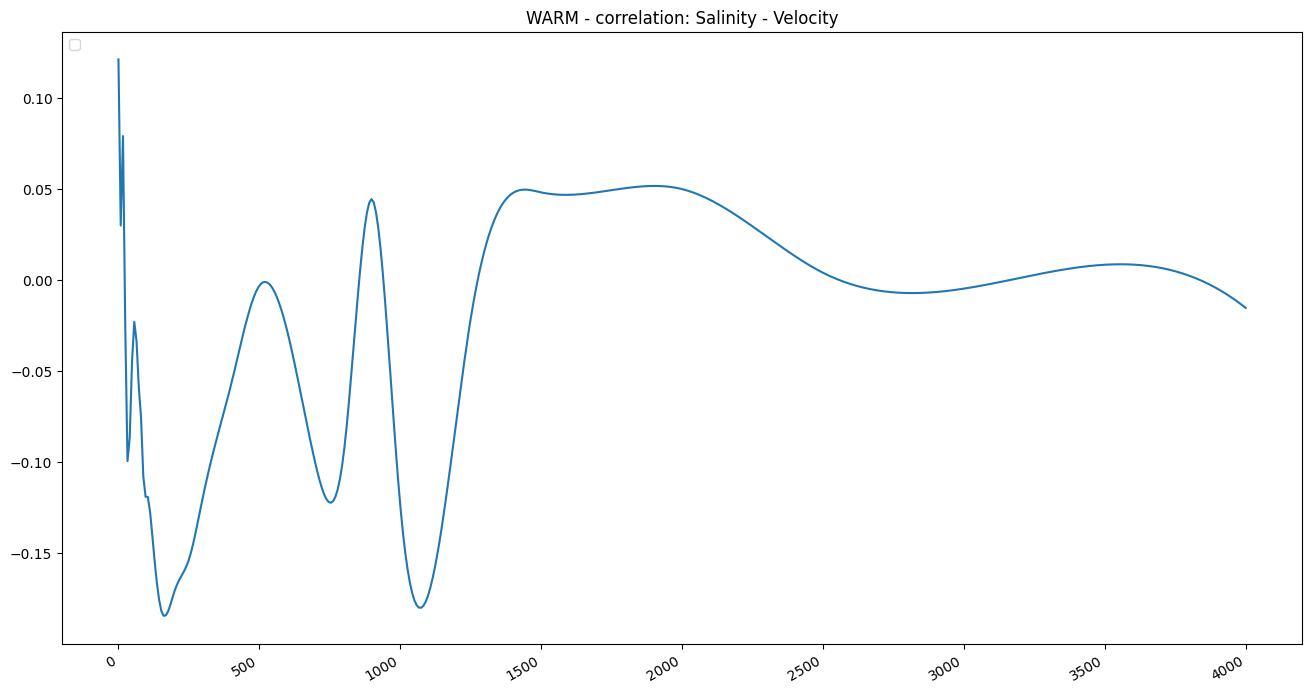

In [30]:
db = db_warm

corrcoef = []
for depth in depths:
    corrcoef.append(
        (
            np.corrcoef(
                db["salinity_" + str(depth) + "_mean"],
                (
                    db["velocity_v_" + str(depth) + "_mean"] ** 2
                    + db["velocity_u_" + str(depth) + "_mean"] ** 2
                )
                ** 0.5,
            )
        )[0][1]
    )

print(corrcoef)

plt.title("WARM - correlation: Salinity - Velocity")

x = np.array([int(depth) for depth in depths])
y = np.array(corrcoef)

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)

plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.8270508979177381, -0.8291042205707261, -0.8300651044676703, -0.8309010423032878, -0.8318440507336466, -0.8325374521672013, -0.8323365622514681, -0.8307984903327967, -0.8197435379758955, -0.7983618550623683, -0.7696586897805624, -0.734390065045348, -0.686422369555248, -0.6376678344797901, -0.5729233816372286, -0.4390253082655484, -0.31167583222846085, -0.17146092430908844, -0.04881160395864183, 0.05018886068725243, 0.2492127365761573, 0.3896177463250933, 0.5372342995816081, 0.6187624560421742, 0.6766091712551628, 0.7184991004125985, 0.7575852639227892, 0.829597947947544, 0.8635547622487436, 0.8293115604164993, 0.7552741651253717, 0.6789938557300911, 0.5808065300947051, -0.016821391096756778, -0.020167949276082994, -0.005566760619975593, 0.009087595751983424, 0.020816593292907835, 0.09159709079855473]


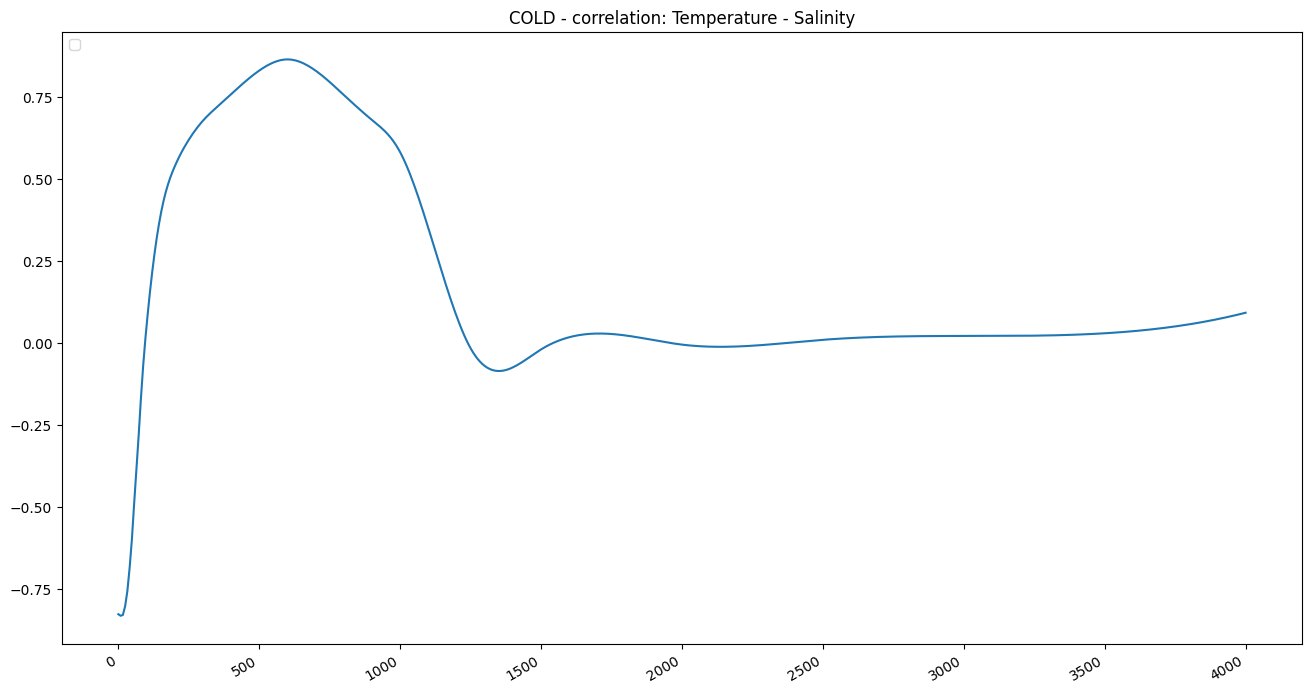

In [31]:
db = db_cold

corrcoef = []
for depth in depths:
    corrcoef.append(
        np.corrcoef(
            db["water_temp_" + str(depth) + "_mean"],
            db["salinity_" + str(depth) + "_mean"],
        )[0][1]
    )

print(corrcoef)

plt.title("COLD - correlation: Temperature - Salinity")

x = np.array([int(depth) for depth in depths])
y = np.array(corrcoef)

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)

plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.37625022930960605, -0.32941941393018465, -0.30335233849868676, -0.27960307209301793, -0.2690658001669114, -0.2593286090964458, -0.2562921196090492, -0.2506278996225019, -0.24650073553117857, -0.24703237999037242, -0.2531812814941655, -0.25416277348098404, -0.2668789629464168, -0.27124037816844576, -0.27814844219179274, -0.27797525904622106, -0.2602274019095202, -0.23455371803228875, -0.2063903458560438, -0.16802917008313326, -0.060168390319563336, 0.06824419357832452, 0.32557132811418255, 0.40211877909779575, 0.3660689451203998, 0.3003703004243534, 0.2351690387787854, 0.14463586243960852, 0.12472259857089317, 0.11540414075571952, 0.09208884491754543, 0.05619141540812068, 0.011935913315160715, -0.13346762778440877, -0.2617042214397798, -0.4569434637675475, -0.41148154241408763, -0.29265438518419296, -0.14334630572646515]


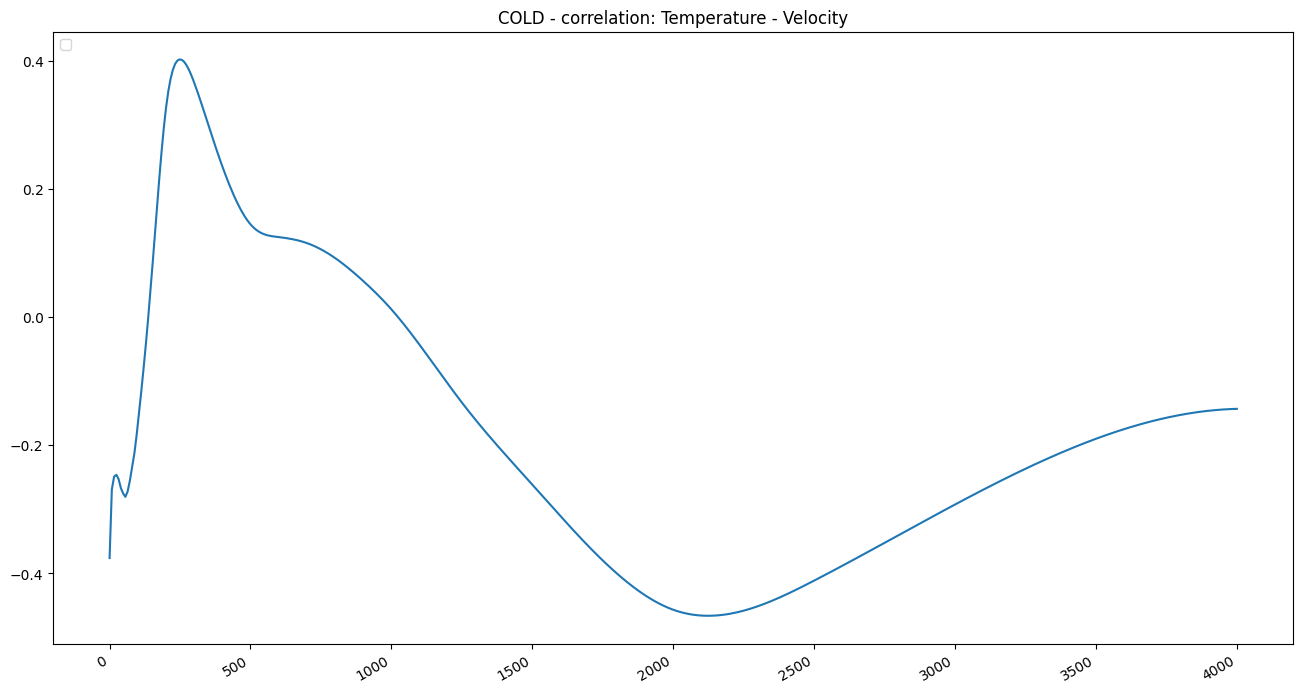

In [32]:
db = db_cold
db = db.sort_values(by="millis", ascending=True)

corrcoef = []
for depth in depths:
    corrcoef.append(
        (
            np.corrcoef(
                db["water_temp_" + str(depth) + "_mean"],
                (
                    db["velocity_v_" + str(depth) + "_mean"] ** 2
                    + db["velocity_u_" + str(depth) + "_mean"] ** 2
                )
                ** 0.5,
            )
        )[0][1]
    )

print(corrcoef)

plt.title("COLD - correlation: Temperature - Velocity")

x = np.array([int(depth) for depth in depths])
y = np.array(corrcoef)

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)

plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.3961082146909357, 0.3505706028136477, 0.326232342467961, 0.29787495011600806, 0.2844588450427889, 0.2693801230743967, 0.2567587237345979, 0.23580171365051053, 0.19251332931115975, 0.14847911520162355, 0.10838183556386982, 0.0636693541662416, 0.022539844067765734, -0.019785535456034765, -0.0615387507196423, -0.14188559303397297, -0.21286375996612172, -0.2692940749097412, -0.30334999565285287, -0.32613852749460776, -0.30360561538150715, -0.19214168680170468, 0.17685946561814725, 0.4168595643025622, 0.45550206536678645, 0.41127494977318174, 0.3403422473008078, 0.19666358100163658, 0.10063892677975692, 0.025905470389818382, -0.016948428749967062, -0.0180580333326336, -0.07239788749396588, 0.008151721307093135, 0.013192792143853065, 0.0070061884000017696, -0.015990267036017147, 0.001108173756468781, -0.024210422855496825]


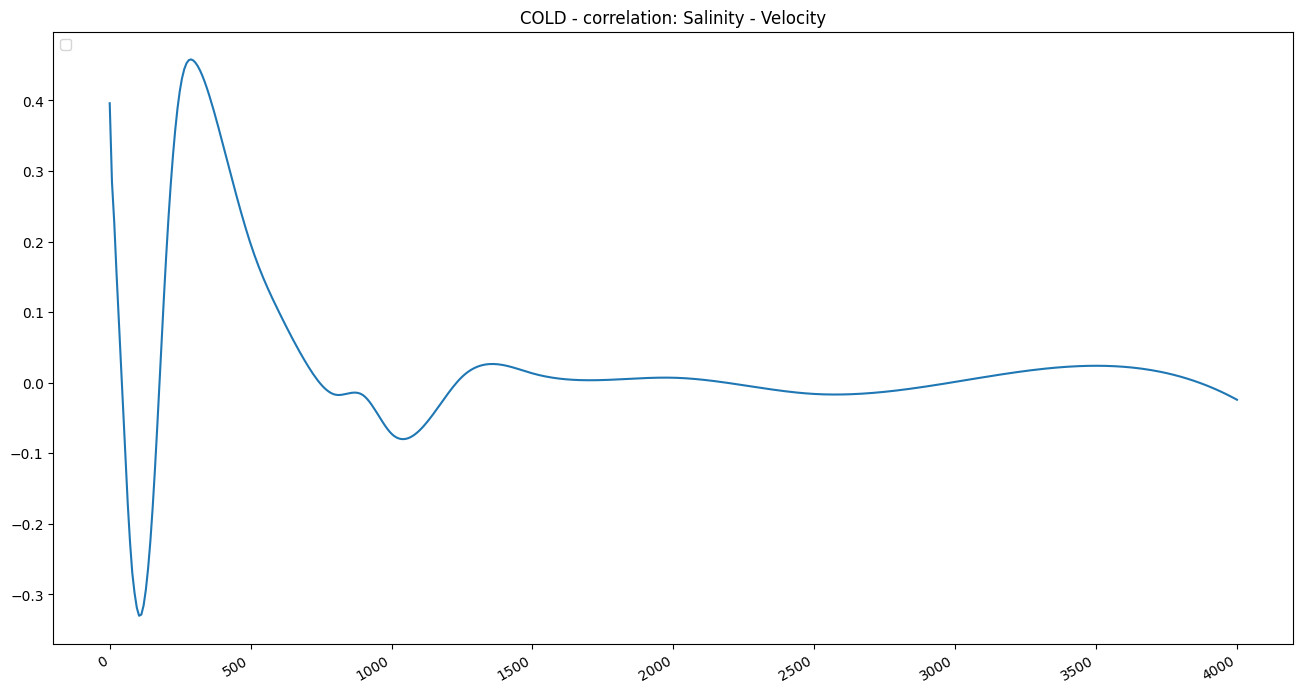

In [33]:
db = db_cold

corrcoef = []
for depth in depths:
    corrcoef.append(
        (
            np.corrcoef(
                db["salinity_" + str(depth) + "_mean"],
                (
                    db["velocity_v_" + str(depth) + "_mean"] ** 2
                    + db["velocity_u_" + str(depth) + "_mean"] ** 2
                )
                ** 0.5,
            )
        )[0][1]
    )

print(corrcoef)

plt.title("COLD - correlation: Salinity - Velocity")

x = np.array([int(depth) for depth in depths])
y = np.array(corrcoef)

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)

plt.gcf().autofmt_xdate()
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

/tmp/ipykernel_28422/3667645998.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(
/tmp/ipykernel_28422/3667645998.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot_date(


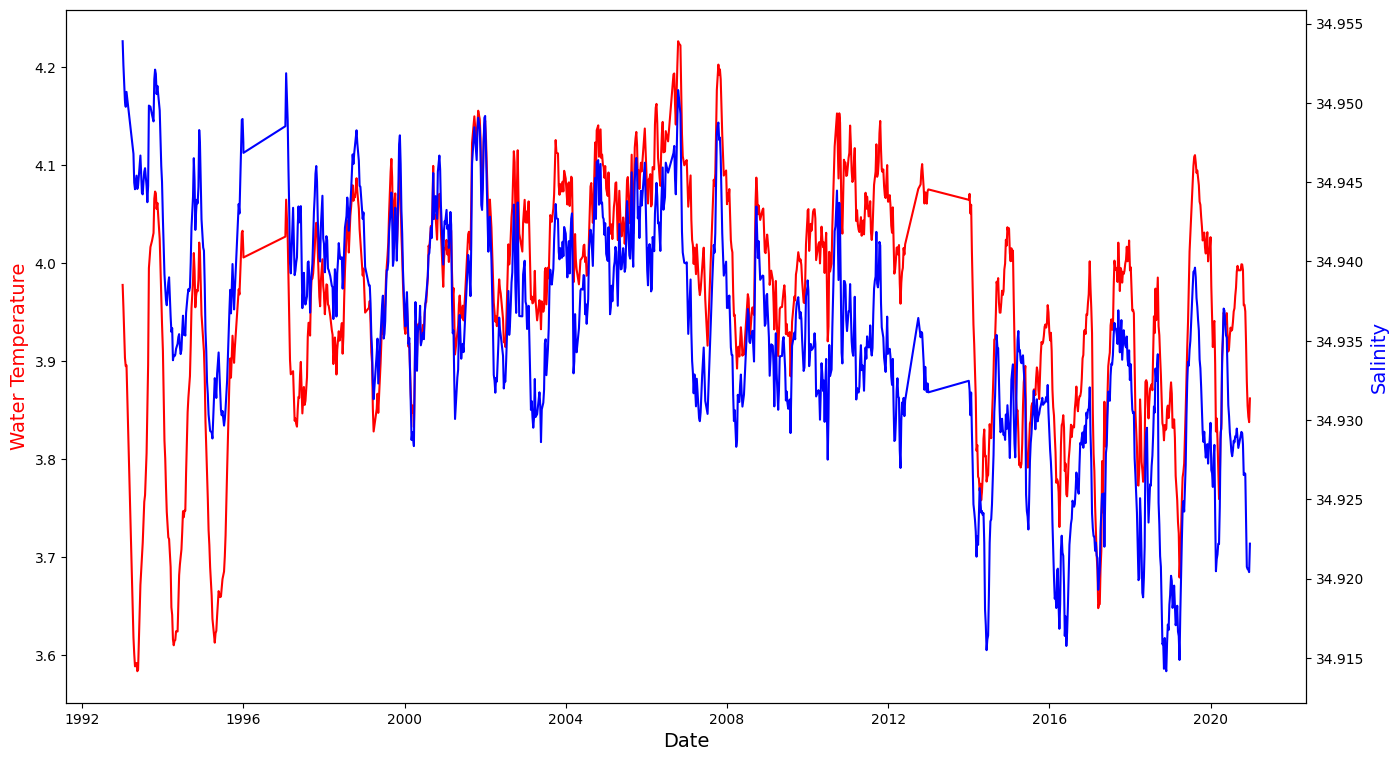

In [34]:
db = db_cold
db = db.sort_values(by="time", ascending=True)

# create figure and axis objects with subplots()
fig, ax = plt.subplots()
# make a plot
ax.plot_date(
    db["time"], db["water_temp_1000_mean"], color="red", linestyle="solid", marker=""
)
# set x-axis label
ax.set_xlabel("Date", fontsize=14)
# set y-axis label
ax.set_ylabel("Water Temperature", color="red", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot_date(
    db["time"], db["salinity_1000_mean"], color="blue", linestyle="solid", marker=""
)
ax2.set_ylabel("Salinity", color="blue", fontsize=14)
plt.show()